# Assignment 6 - FMT - Feature Engineering

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly superplasticizer, coarse aggregate, and fine aggregate.

   
The purpose of the case study is to Model the strength of high performance concrete using Machine Learning.


### Import Libraries

In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import itertools
%matplotlib inline
sns.set(style="ticks", color_codes=True)

from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV







### Read Data

In [442]:
concrete = pd.read_csv('concrete.csv')

### Perform basic EDA

In [443]:
# Shape of Data
concrete.shape

(1030, 9)

In [444]:
# Info
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [445]:
concrete.head(15)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0    141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1    168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2    250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3    266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4    154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5    255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6    166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7    251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8    296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9    155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   
10   151.8  178.1  138.7  167.5          18.3      944.0    694.6   28   
11   173.0  116.0    0.0  192.0           0.0      946.8    856.8    3   
12   385.0    0.0    0.0  186.0           0.0      966.0    763.0   14   
13   237.5  237.5    0.0  228.0           0.0      932.0    594.0    7   
14   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   

    strength  
0      29.89  
1      23.51  
2      29.22  
3      45.85  
4      18.29  
5      21.86  
6      15.75  
7      36.64  
8      21.65  
9      28.99  
10     36.35  
11      6.94  
12     27.92  
13     26.26  
14     23.89

In [446]:
# Summary of Numeric Attributes
concrete.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [447]:
# Check missing values
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [448]:
# Check for data pollution - ensure all values are numeric
#concrete.applymap(lambda x: isinstance(x, (int, float))).all(1)
concrete[~concrete.applymap(lambda x: isinstance(x, (int, float))).all(1)]
# Data is all OK - All are numeric

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

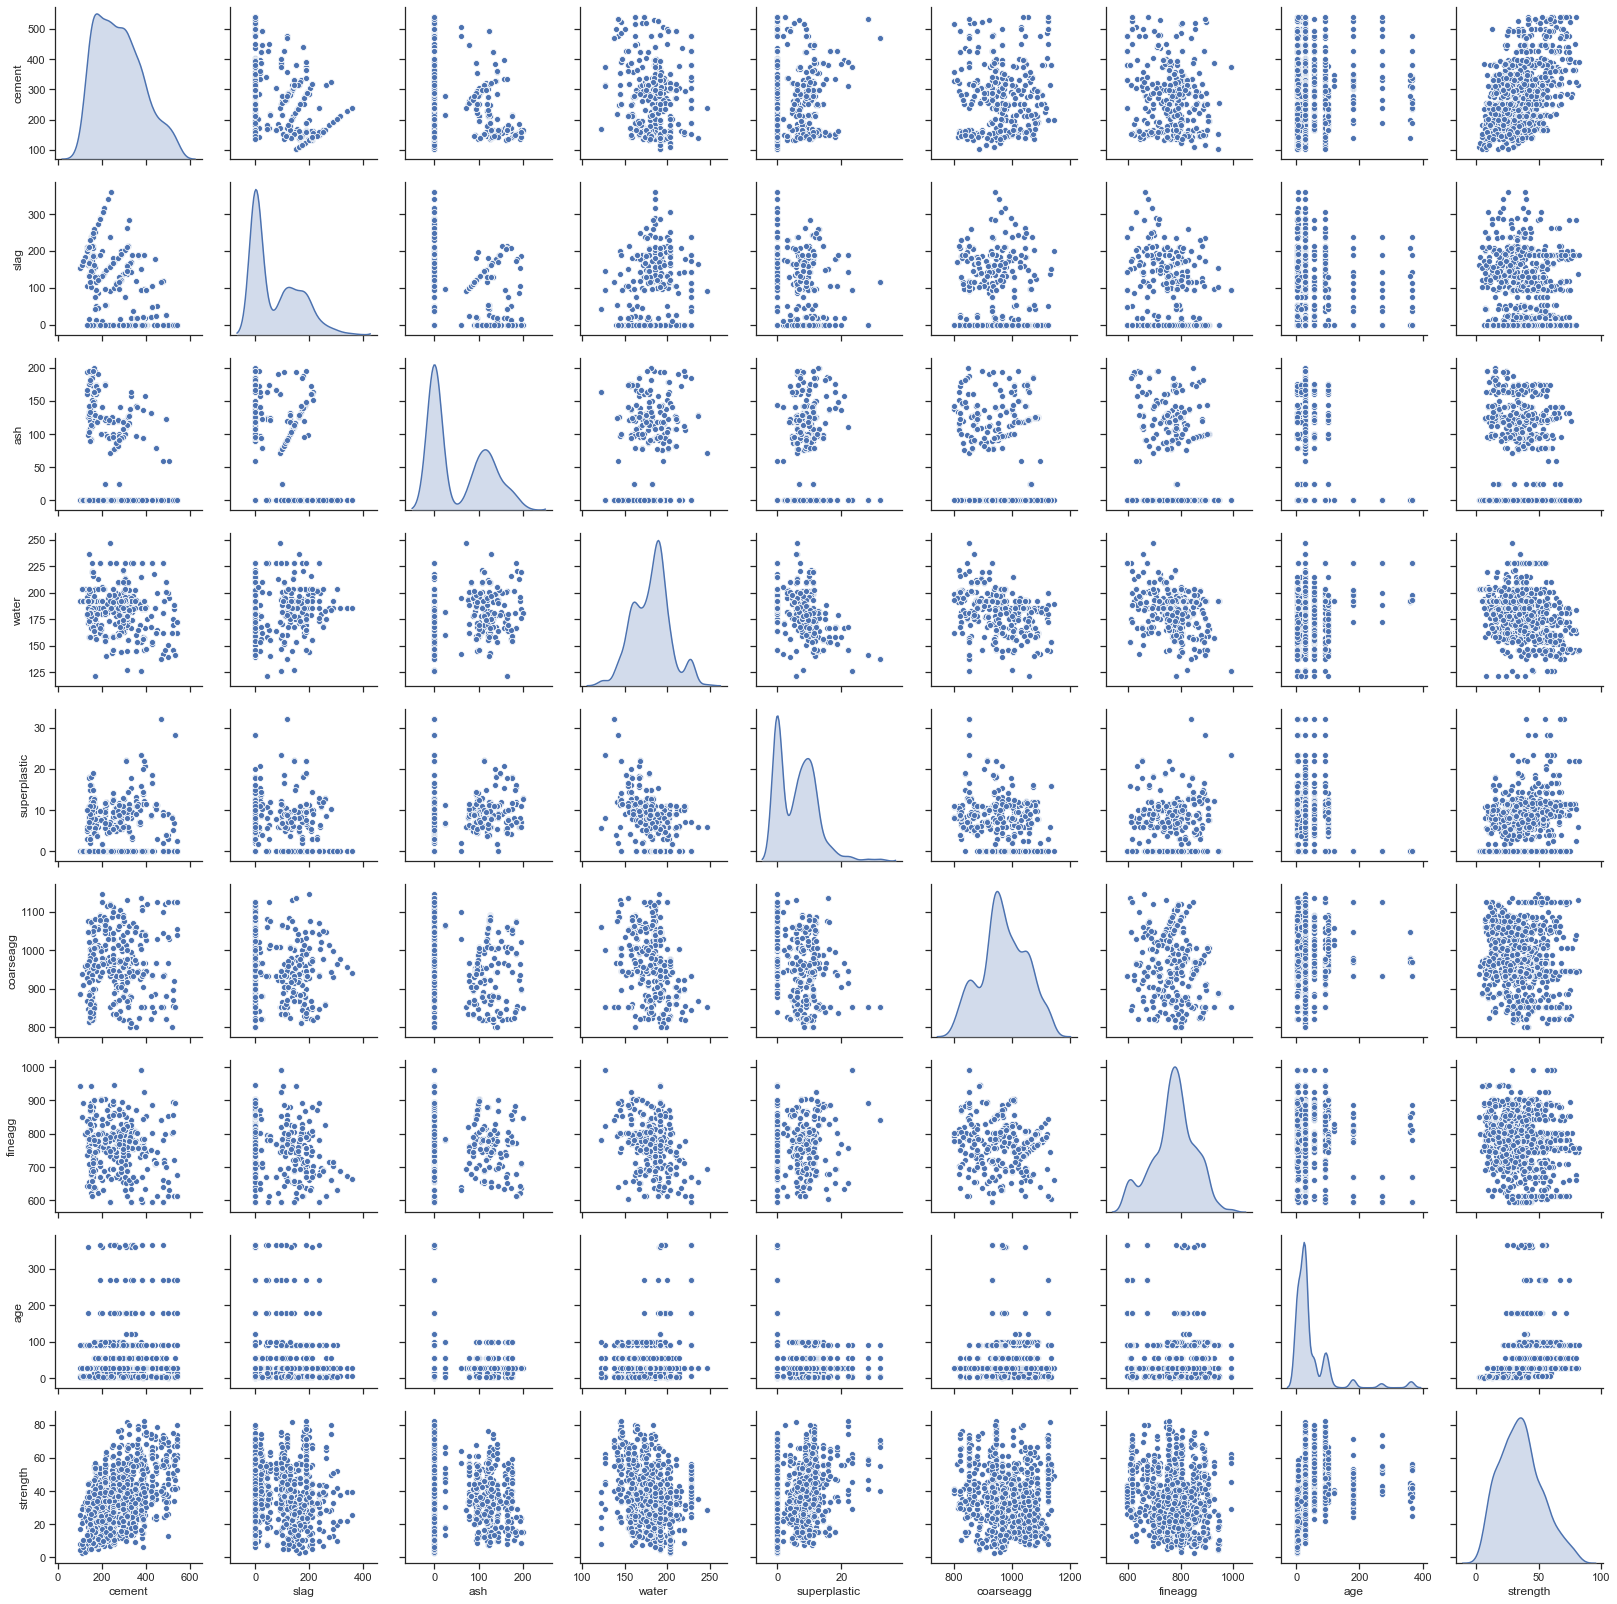

In [449]:
from scipy.stats import pearsonr

# def corrfunc(x,y, ax=None, **kws):
#     """Plot the correlation coefficient in the top left hand corner of a plot."""
#     r, _ = pearsonr(x, y)
#     ax = ax or plt.gca()
#     # Unicode for lowercase rho (ρ)
#     rho = '\u03C1'
#     ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(concrete, diag_kind='kde')
# g.map_lower(corrfunc)
# plt.show()


#### Multiple clusters or multiple Gaussian distributions
- Attributes Slag, Ash and Superplastics seem to have two distinct clusters. This will be explored further
- Water, courseagg, fineagg and age may or may not have multiple gaussian distributions. These will be explored further.


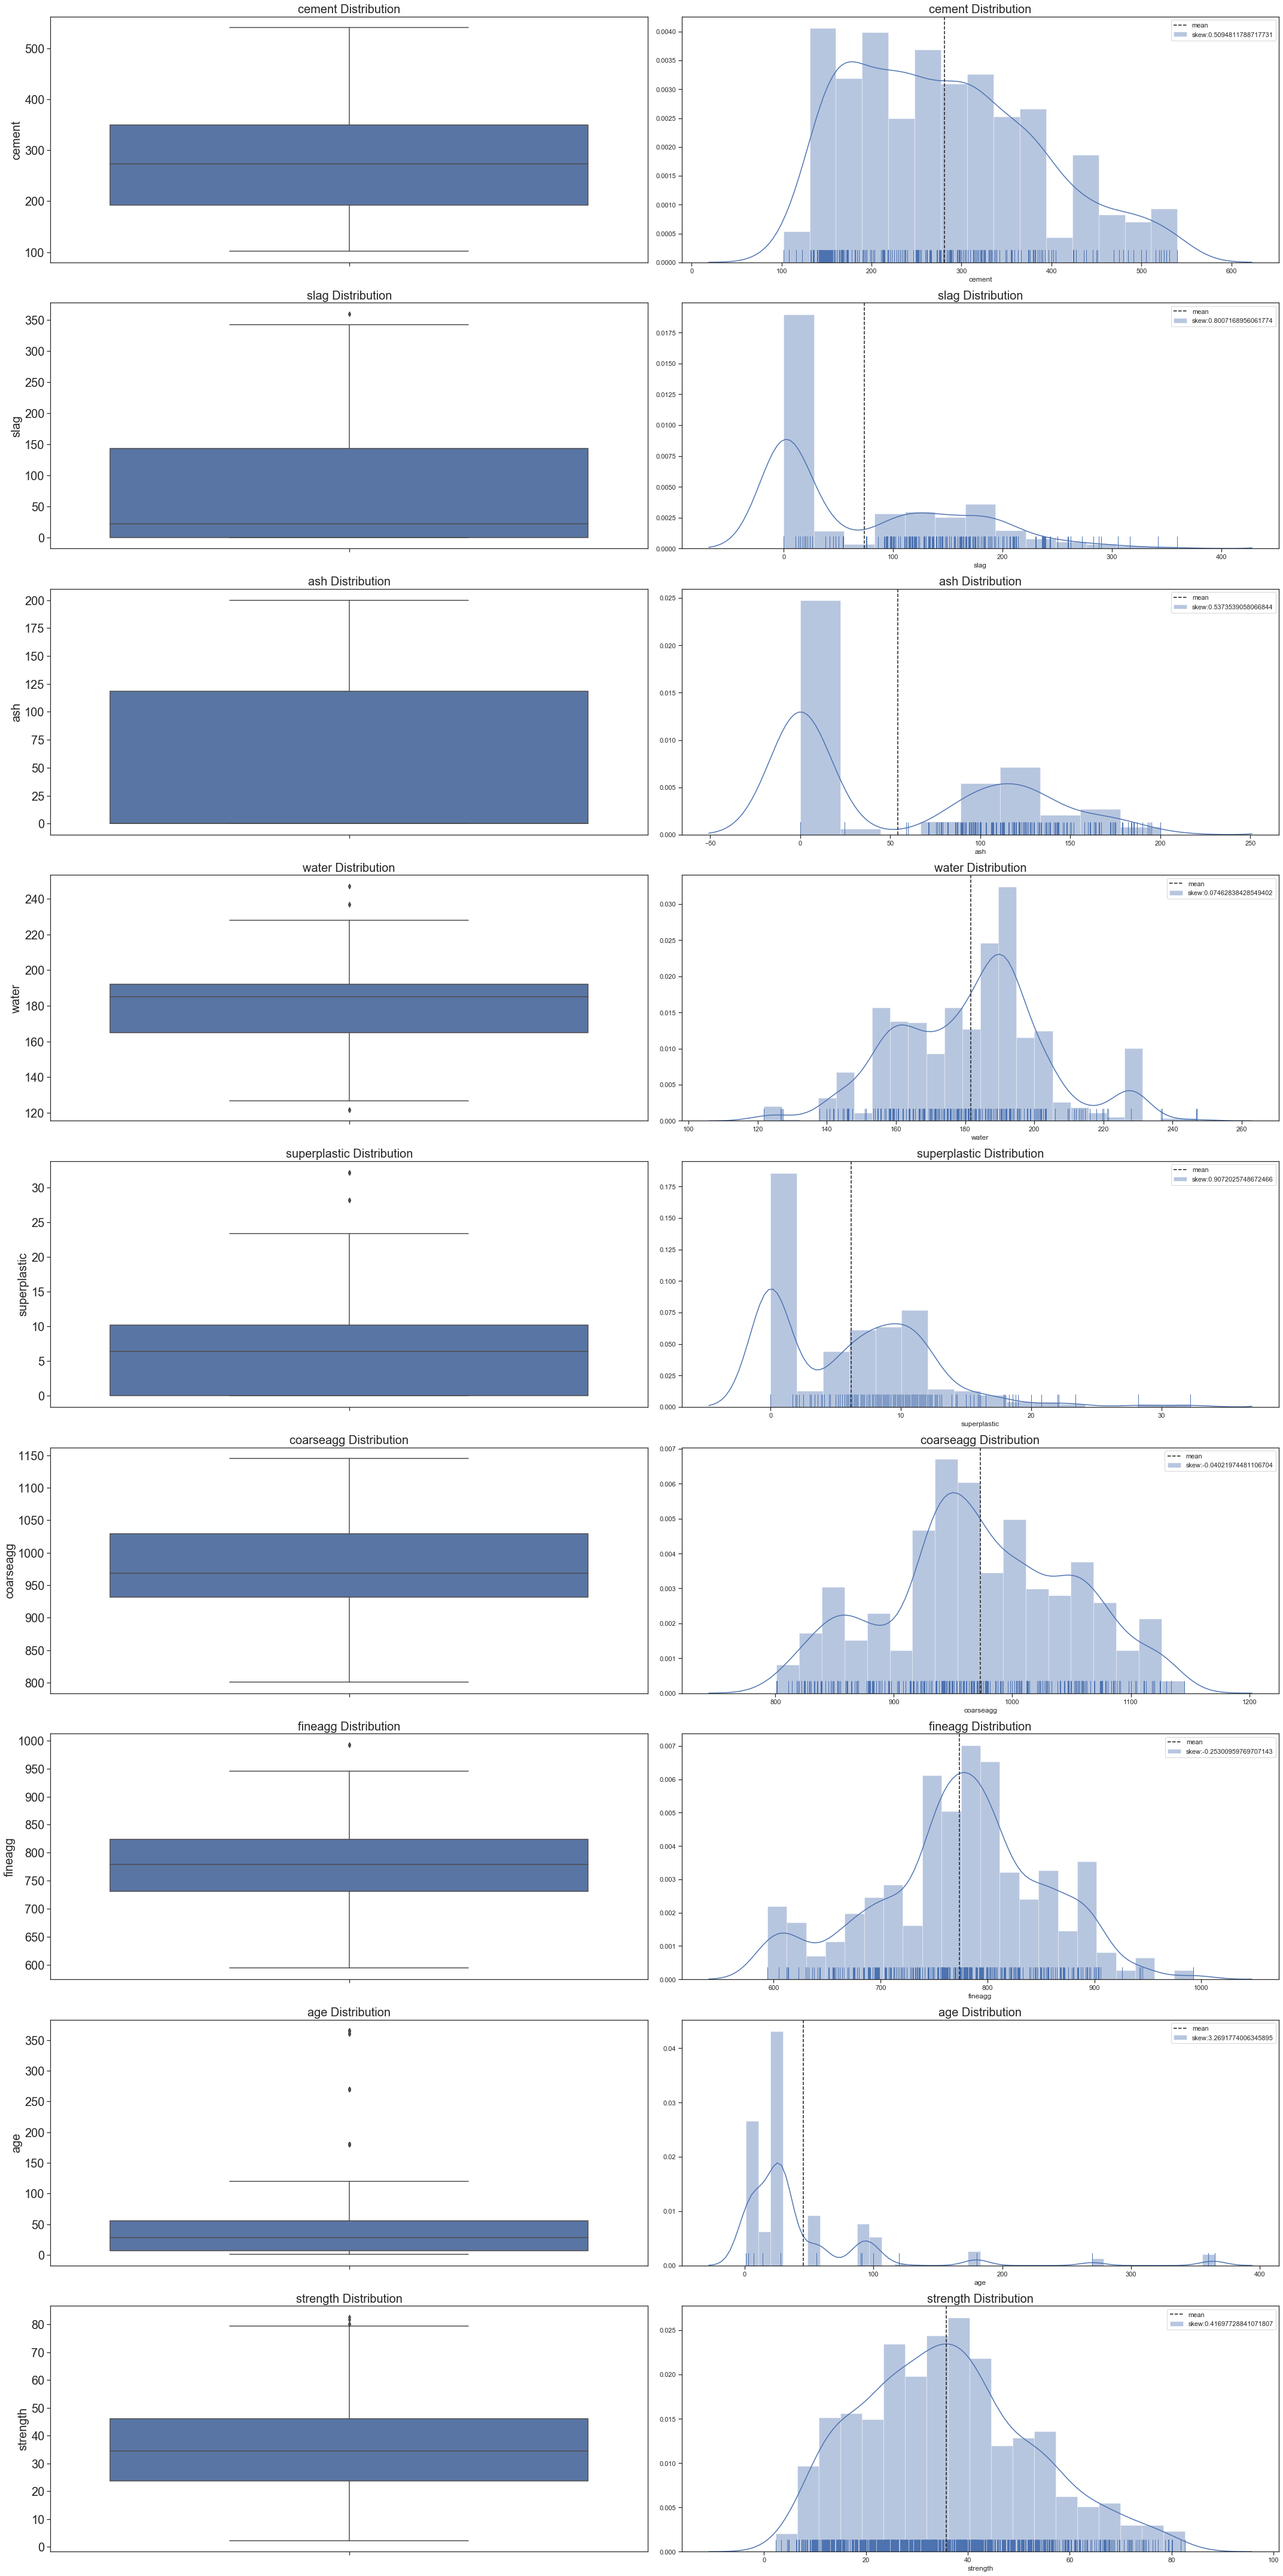

In [450]:
# Visualize individual variables
fig, ax_arr = plt.subplots(nrows = 9, ncols = 2, figsize = (30,60))
ind_vars = concrete.columns

plt_row=0
for col in ind_vars:
    #print(col)
    # plot boxplot with class as hue
    sns.boxplot(y = concrete[col], data = concrete, orient = 'v', ax = ax_arr[plt_row, 0])
    ax_arr[plt_row,0].set_ylabel(col, fontsize=20)
    ax_arr[plt_row,0].set_title(col + ' Distribution', fontsize=20)
    ax_arr[plt_row,0].tick_params(labelsize=20)

    sns.distplot( concrete[col],  ax = ax_arr[plt_row,1], rug=True, label= 'skew:' + str(concrete[col].skew()))
    ax_arr[plt_row,1].axvline(concrete[col].mean(),linestyle="dashed",label="mean",color="k")
    ax_arr[plt_row,1].set_title(col + ' Distribution', fontsize=20)
    ax_arr[plt_row,1].legend(loc="best")
    
#    sns.regplot(data=concrete, x=col, y='strength', ax = ax_arr[plt_row,1])
#    ax_arr[plt_row,1].annotate(stats.pearsonr,
#                xy=(.65, .03), xycoords=ax_arr[plt_row,1].transAxes, fontsize='xx-small')
    #ax_arr[plt_row,1].annotate(stats.pearsonr, xy=(.1, .9))
#    sns.relplot(x="strength", y=col, kind="line", ci="sd", data=concrete, ax = ax_arr[plt_row,1]);
    #ax_arr[plt_row,2].set_title('Distribution of ' + col + ' for Strength with SD', fontsize=10)

    plt_row+=1
            
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Observations
1. Strength is almost normally distributed with a few outliers close to the median.
2. Age has a long tail and is right skewed with a skew value of 3.3. From the graph above it appears that bulk of data for age is concentrated between 0 and 50 with a few outliers. This is a feature of interest. 
3. Fineagg is almost normally distributed with a slight bulge at lower value. It could mean a different cluster. Data is concentrated between 720 and 830. It also has a few outliers for higher values.
4. Coarseagg is concentrated between 920 and 1030.
5. Superplastic feature is concentrated between 0 and 10. From the distribution above it appears that superplastic is not a mandatory ingredient since value of 0 has the highest frequency. Looking at the pairplot above, there is no clear relation between superplastic and strength. Strength discreetly increases even if superplastic has a value of 0. We'll explore if we create a separate model for data with and without superplastic.
6. Attribute water has outliers on both sides and bulk of the data is concentrated between 150 and 210. Median is closer to the 3rd Quantile.
7. Ash distribution is concentrated between 0 and 125 with the highest frequency of data with 0 value. This also seems like a non-mandatory ingredient like superplastic. We need to explore if we create separate model without ash and superplastic.
8. slag is concentrated between 0 and 150 with the highest frequency of 0. Its similar to ash and superplastic.
9. Cement is almost normally distributed with a small tail on the right. From the pairplot it appears that cement has a positive correlation with strength where adding more cement increases strength. Data is between 200 and 350.

#### Exploring Outliers
- From the box plot above, the following columns have outliers:
  - age, fineagg, superplastic, water and slag

In [451]:
# Interquartile Range Method
# calculate interquartile range
def get_outliers(col):
    att= concrete[col]
    q25, q75 = np.percentile(att, 25), np.percentile(att, 75)
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in att if x < lower or x > upper]
    print(col, " IQR: ", lower," - ", upper)
    print(col, " outliers:", outliers)
    print("---------------------------------------------------------")

cols = ["age", "fineagg", "superplastic", "water", "slag"]

for col in cols:
    get_outliers(col)
    #sns.jointplot(col, "strength", data=concrete, kind="reg").annotate(stats.pearsonr)

age  IQR:  -66.5  -  129.5
age  outliers: [180, 365, 180, 180, 180, 365, 180, 270, 180, 360, 365, 365, 180, 180, 270, 270, 270, 270, 180, 180, 270, 360, 180, 360, 180, 365, 360, 365, 365, 180, 270, 180, 180, 365, 180, 180, 270, 270, 180, 180, 365, 365, 180, 365, 360, 180, 270, 180, 270, 180, 365, 360, 270, 365, 180, 180, 365, 180, 270]
---------------------------------------------------------
fineagg  IQR:  591.3749999999998  -  963.575
fineagg  outliers: [992.6, 992.6, 992.6, 992.6, 992.6]
---------------------------------------------------------
superplastic  IQR:  -15.299999999999999  -  25.5
superplastic  outliers: [28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2]
---------------------------------------------------------
water  IQR:  124.25000000000001  -  232.64999999999998
water  outliers: [247.0, 246.9, 121.8, 121.8, 121.8, 237.0, 121.8, 236.7, 121.8]
---------------------------------------------------------
slag  IQR:  -214.42499999999998  -  357.375
slag  outliers: 

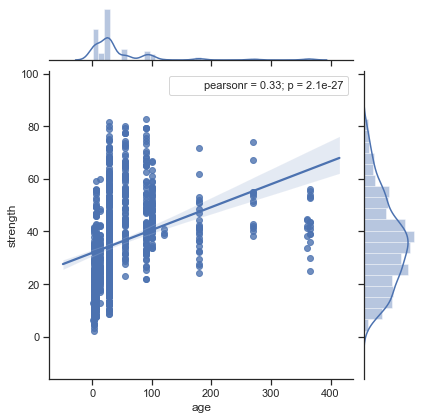

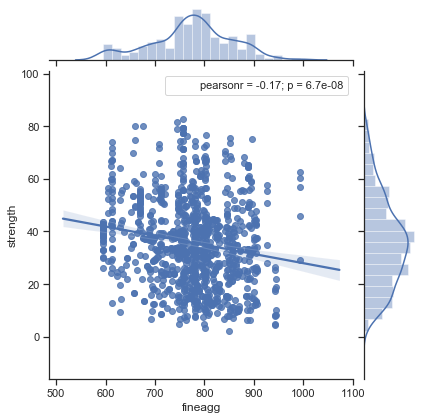

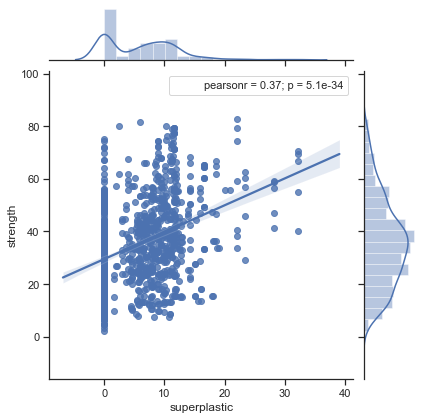

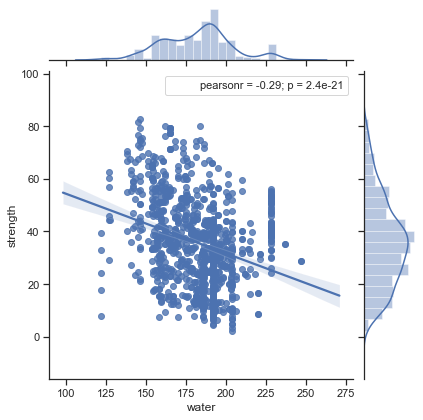

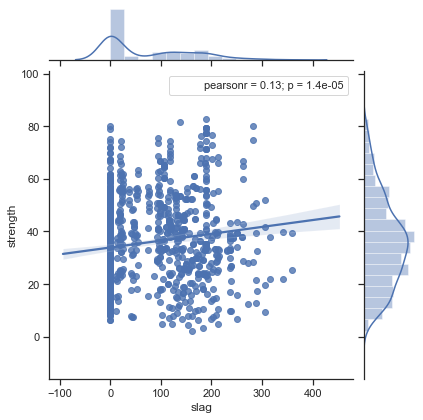

In [452]:
#### Explore correlation with strength
cols = ["age", "fineagg", "superplastic", "water", "slag"]
for col in cols:
    sns.jointplot(col, "strength", data=concrete, kind="reg").annotate(stats.pearsonr)

- ##### We will try log transformation of age feature to reduce the effect of outliers. Other techniques like binning or removing outliers lead to loss of information so we will not do it. 

- ##### In addition, we will use feature regularization and other such models that are robust to outliers.

3.2691774006345895
-0.15135107046754767


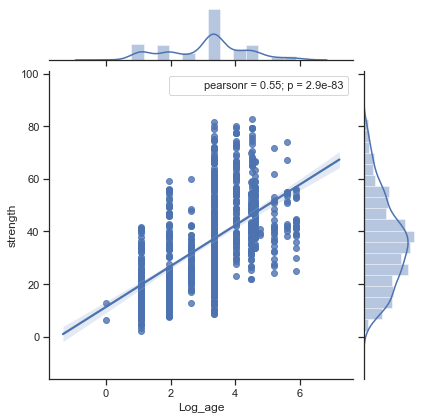

In [453]:
##### Explore Log Transformation of age
concrete["Log_age"] = concrete["age"].map(lambda i: np.log(i) if i > 0 else 0) 
print(concrete['age'].skew())
print(concrete['Log_age'].skew())
sns.jointplot("Log_age", "strength", data=concrete, kind="reg").annotate(stats.pearsonr)

- From the aboe it appears that age distribution is improved after log transformation.

#### Exploring correlation between ingredients and with strength

Correlation with Target (Strength): 
 strength        1.000000
Log_age         0.552180
cement          0.497832
superplastic    0.366079
age             0.328873
slag            0.134829
ash            -0.105755
coarseagg      -0.164935
fineagg        -0.167241
water          -0.289633
Name: strength, dtype: float64


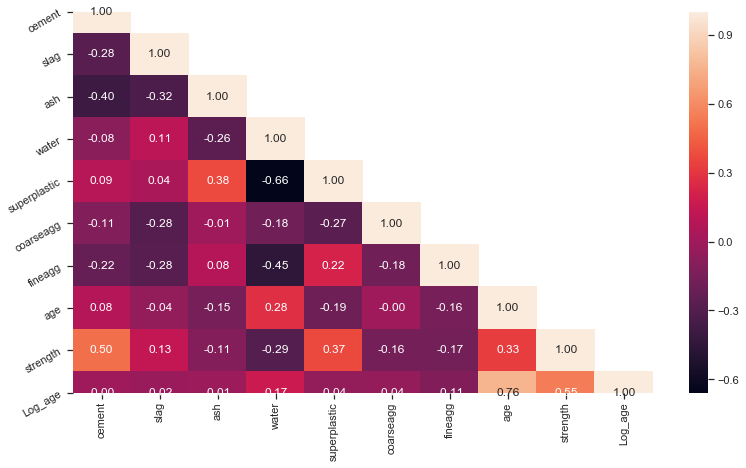

In [454]:
# Correlation with heat map
corr = concrete.corr()
print("Correlation with Target (Strength): \n", corr['strength'].sort_values(ascending=False))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

##### Observation
- ash and cement have a moderate negative correlation
- ash and superplastic have a moderate negative correlation
- superplastic and water have strong negative correlation
- fineagg and water have moderate negative correlation
- strength and age have some correlation
- strength and Log age show a strong correlation

#### Applying Models

- We will try different regression models and determine what works better

In [703]:
modelResult = {}

def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type, m_name=""):

    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    pred = algorithm.predict(dtestx)
    rmse = np.sqrt(mean_squared_error(dtesty,pred)) 
    print ("ROOT MEAN SQUARED ERROR :", rmse)
    print ("MEAN ABSOLUTE ERROR :", mean_absolute_error(dtesty,pred)) 
    print ("***************************************************************************")
    train_score = algorithm.score(dtrainx,dtrainy)
    test_score = algorithm.score(dtestx,dtesty)
    print ("TRAIN SCORE :", train_score) 
    print ("TEST SCORE :", test_score) 
#     print(dtesty[:].values.ravel())
#     print(pred.ravel())
    pr,p= stats.pearsonr(x=dtesty[:].values.ravel(), y=pred.ravel())
    print ("PEARSONS COEFF for TEST :", pr,p) 
    print ("***************************************************************************")
    prediction = pd.DataFrame(pred)
    # neg_mean_absolute_error
    # neg_mean_squared_error
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    cv_mean = cross_val.mean()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cv_mean)
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    with sns.axes_style("white"):
        sns.jointplot(x=dtesty[:].values.ravel(), y=pred.ravel(), kind="reg", color="k").annotate(stats.pearsonr);

        
    if (m_name):
        modelResult[m_name]= {"Model":m_name, "RMSE":rmse, "Train Score":train_score, "Test Score":test_score, "Pearsonsr":pr, 'CV Mean':cv_mean}
        
    
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["strength"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm['rm'].coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm['rm'].feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
        
    elif of_type == "polycoef":
        coef = pd.DataFrame(algorithm['rm'].coef_.ravel())
        print ("***************************************************************************")
        print("Coefficents shape:", coef.shape)
        print("Non-zero:", (coef!=0).sum())
        print("Coefficents:", coef)


import warnings
warnings.filterwarnings("ignore")

#### Model Regressors on Original Data

In [704]:
# First with Original Age
X = concrete.drop(['strength', 'Log_age'], axis=1)
Y = concrete[['strength']]

# 30% of the data will be used for testing
test_size= 0.30
seed = 100

k_fold = KFold(n_splits=10, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#### Fit a simple Linear Regressor

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.038916801186476
MEAN ABSOLUTE ERROR : 8.034492030867584
***************************************************************************
TRAIN SCORE : 0.611418030234625
TEST SCORE : 0.6222829902903305
PEARSONS COEFF for TEST : 0.7889605893906463 6.670210019232209e-67
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -113.53259216645026
cv-std  : 25.292111202183502
cv-max  : -83.54157934088721
cv-min  : -176.90290272185288


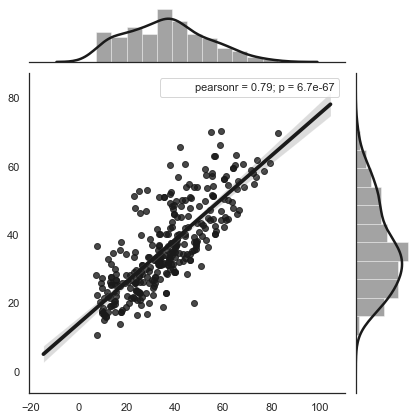

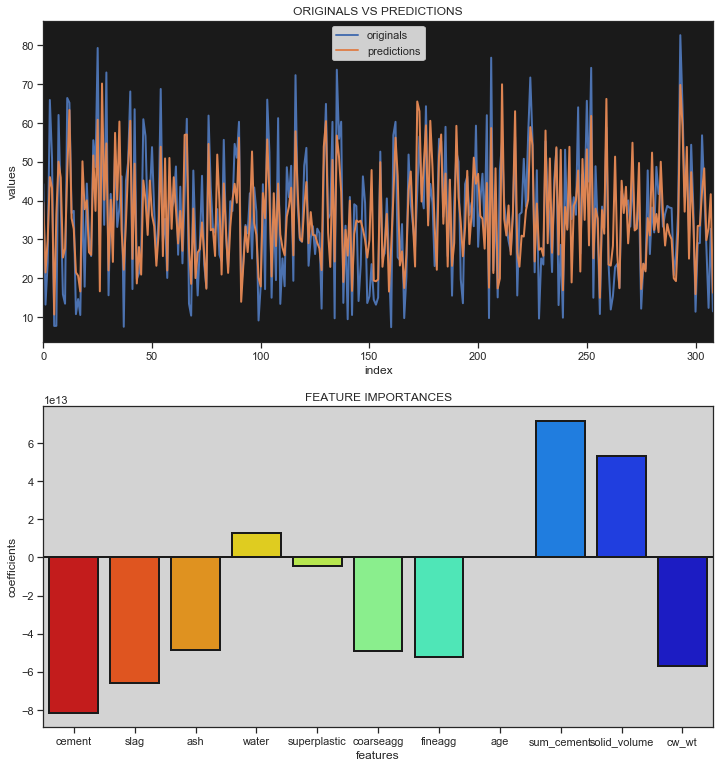

In [705]:
from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
pipe_lr = Pipeline([('scl', StandardScaler()), ('rm', LinearRegression())]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"coef", "LR - Standard Scaler - Original Data")



#### Overall 79% does not look good.

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rm',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)
********************************************************

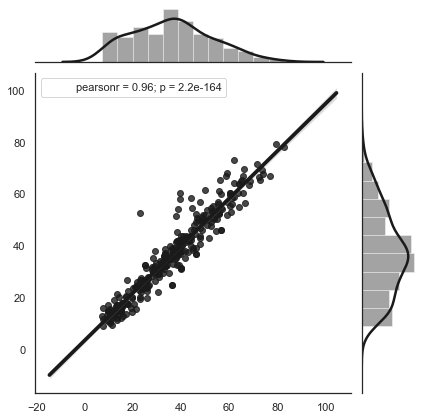

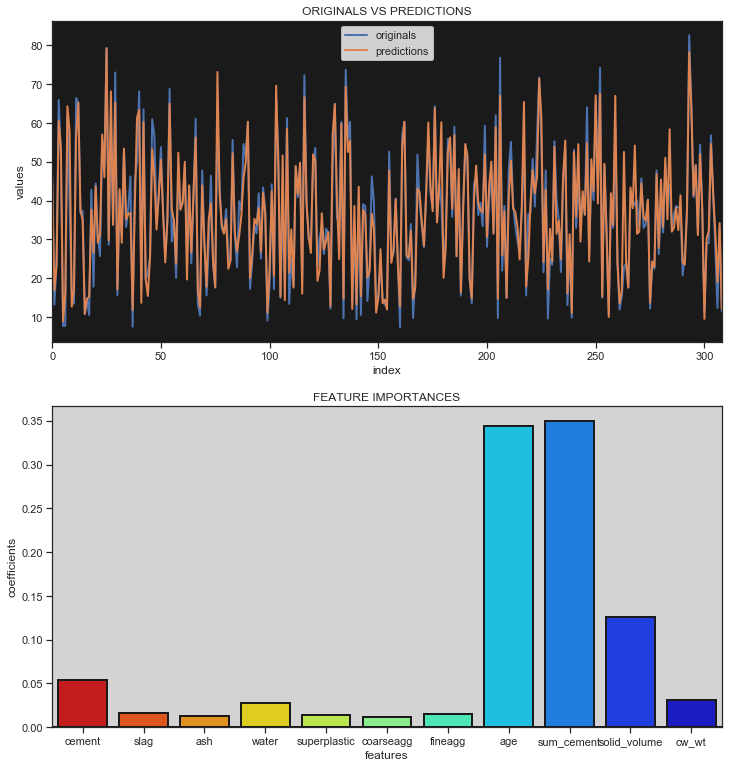

In [706]:
from sklearn.ensemble import RandomForestRegressor

pipe_lr = Pipeline([('scl', StandardScaler()), ('rm', RandomForestRegressor())]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"feat", "RandomForest - StandardScaler - Original Data")

##### 96%!! However, for RandomForestRegressor, Train Score (99%) is much higher that Test Score (91%) - points to an overfit model. In this exercise, I'll focus more on Lasso and Ridge Regression and will not try other forms of Decision Trees.

##### Lasso

In [707]:
modelResult

{'LR - Standard Scaler - Original Data': {'Model': 'LR - Standard Scaler - Original Data',
  'RMSE': 10.038916801186476,
  'Train Score': 0.611418030234625,
  'Test Score': 0.6222829902903305,
  'Pearsonsr': 0.7889605893906463,
  'CV Mean': -113.53259216645026},
 'RandomForest - StandardScaler - Original Data': {'Model': 'RandomForest - StandardScaler - Original Data',
  'RMSE': 4.841283815057333,
  'Train Score': 0.986653942861927,
  'Test Score': 0.9121556325843099,
  'Pearsonsr': 0.9552022314832177,
  'CV Mean': -25.471686382498067}}

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rm',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.257279059258805
MEAN ABSOLUTE ERROR : 8.257140404865313
***************************************************************************
TRAIN SCORE : 0.5958713363372727
TEST SCORE : 0.6056724004387682
PEARSONS COEFF for TEST : 0.7871598733379505 2.1105317229721986e-66
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -117.21280203608094
cv-std  : 24.838057789347452
cv-m

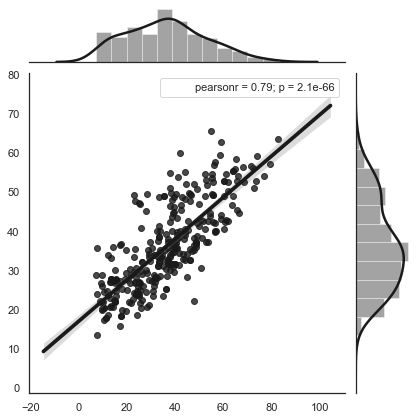

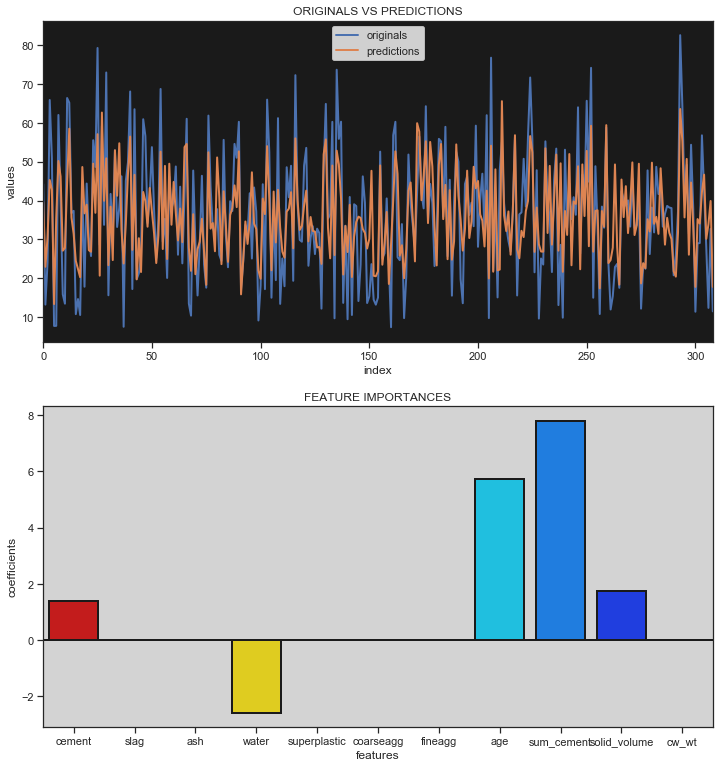

In [708]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('rm', Lasso())]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"coef", "Lasso - StandardScaler - Original Data")

#### Try transforming the data using box-cox/yeo-johnson to make the distributions more Gaussian like and minimize/eliminate outliers.

Pipeline(memory=None,
         steps=[('scl',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('rm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.8474864000511255
MEAN ABSOLUTE ERROR : 5.381860917716974
***************************************************************************
TRAIN SCORE : 0.8253501928152274
TEST SCORE : 0.824266244731072
PEARSONS COEFF for TEST : 0.9084587084030348 2.468509940607913e-118
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -51.393776444956906
cv-std  : 15.44235512829354
cv-max  : -33.809312820714204
cv-min  : -87.21697105113151


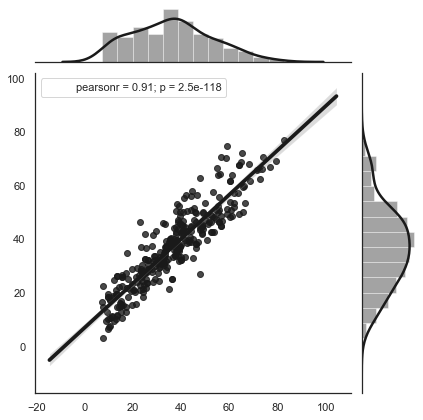

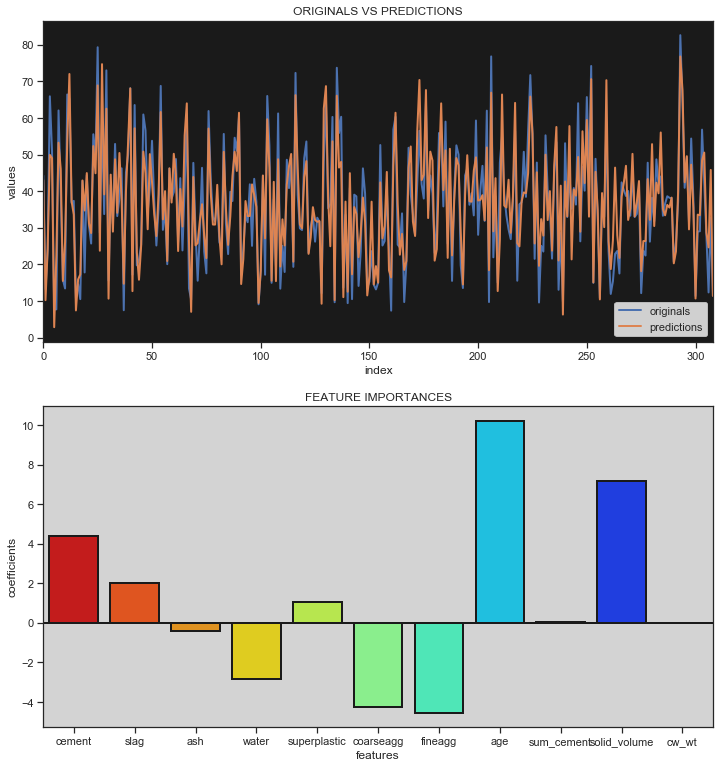

In [709]:

pipe_lr = Pipeline([('scl', PowerTransformer()), ('rm', LinearRegression())]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"coef", "Linear Regression - PowerTransformer - Original Data")

#### Ok. Transformation improved the performance - 91%, without overfitting.
#### This is a big jump. Try other Regressors to see if they give us better performance.

#### Create a regularized RIDGE model and note the coefficients

Pipeline(memory=None,
         steps=[('scl',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('rm',
                 Ridge(alpha=0.5, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.842231008763656
MEAN ABSOLUTE ERROR : 5.379647166740847
***************************************************************************
TRAIN SCORE : 0.8253278012780965
TEST SCORE : 0.824535889731856
PEARSONS COEFF for TEST : 0.9086081297442707 1.9439247417164538e-118
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -51.1759804189482
cv-std  : 15.324485947000916
cv-max  : -33.85883234544189
cv-min  : -86.

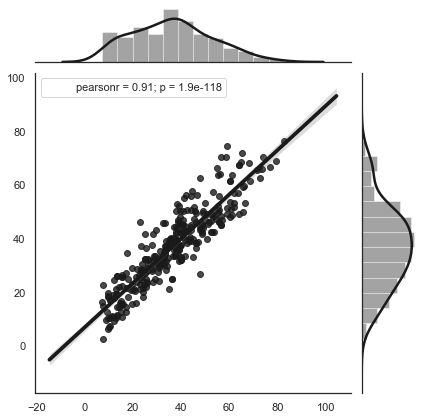

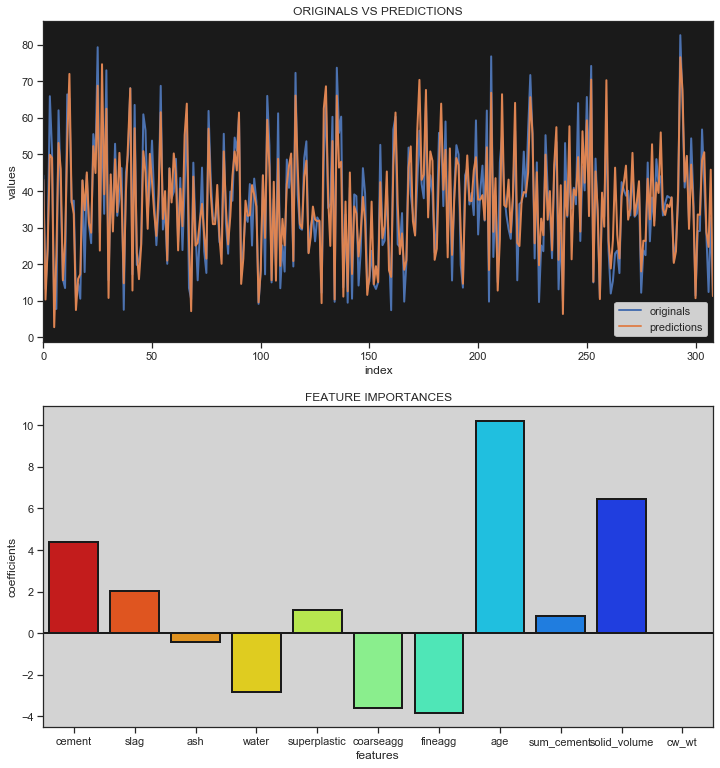

In [710]:
# ridge = Ridge(alpha=.3)
# ridge.fit(x_train,y_train)
# print ("Ridge model:", (ridge.coef_))

pipe_lr = Pipeline([('scl', PowerTransformer()), ('rm', Ridge(alpha=0.5))]) 

model(pipe_lr,x_train,y_train,x_test,y_test,"coef", "Ridge - PowerTransformer - Original Data")

Pipeline(memory=None,
         steps=[('scl',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('rm',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.819505511077505
MEAN ABSOLUTE ERROR : 5.369177519240779
***************************************************************************
TRAIN SCORE : 0.8242479407048533
TEST SCORE : 0.8256995123146814
PEARSONS COEFF for TEST : 0.909304595936295 6.348928058150763e-119
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -51.263019

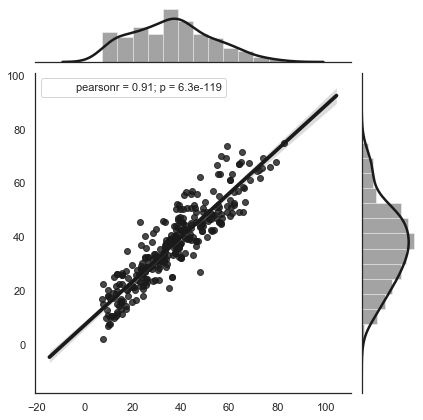

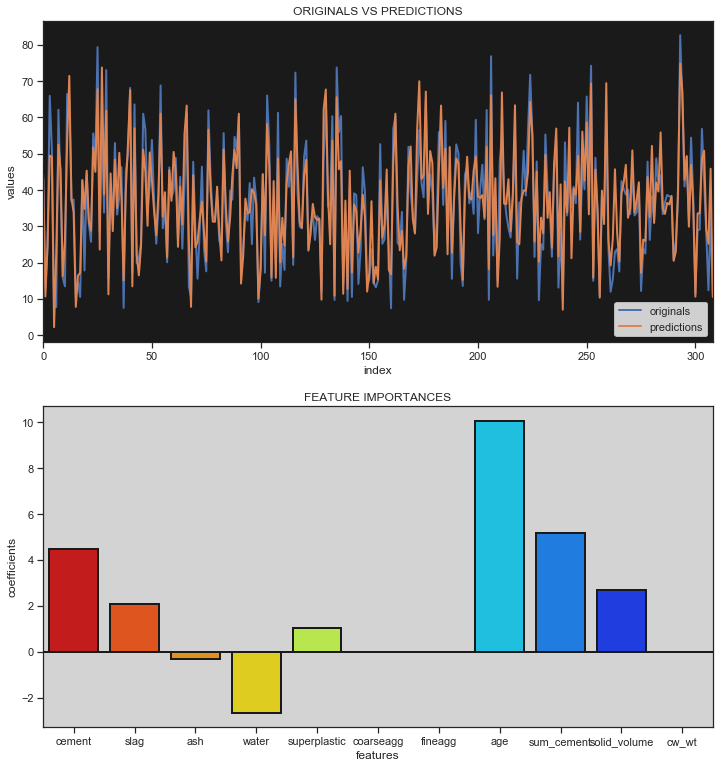

In [711]:
pipe_lr = Pipeline([('scl', PowerTransformer()), ('rm', Lasso(alpha=0.1))]) 


# pipe_lr.fit(x_train,y_train)
# print ("Lasso model:", (lasso.coef_))

model(pipe_lr,x_train,y_train,x_test,y_test,"coef", "Lasso - PowerTransformer - Original Data")

#### We do not see much difference between Linear, Ridge and Lasso. 
### Let us generate polynomial features reflecting the non-linear interaction between some dimensions

Pipeline(memory=None,
         steps=[('scl',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('rm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.965481712566379
MEAN ABSOLUTE ERROR : 4.529710278105883
***************************************************************************
TRAIN SCORE : 0.8927800470900281
TEST SCORE : 0.8666221015404608
PEARSONS COEFF for TEST : 0.9324439989146514 9.099328252726704e-138
***************************************************************************
CROSS VALIDATION SCORE
************************

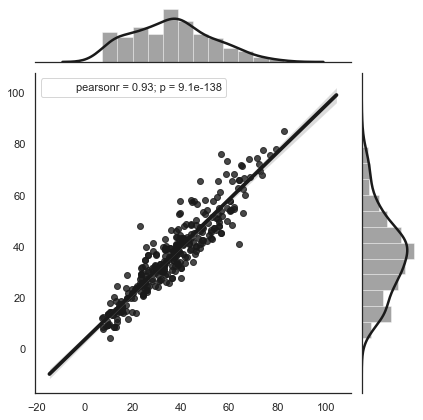

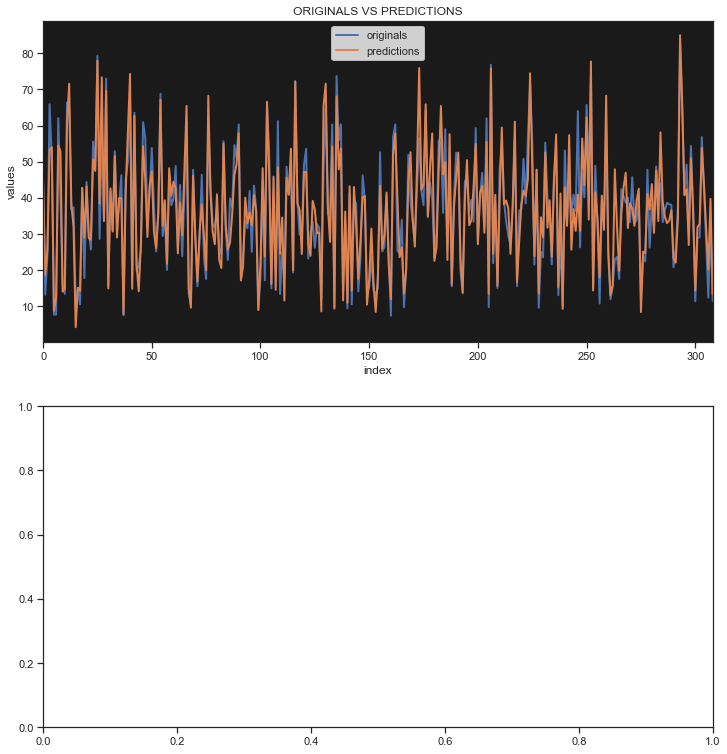

In [712]:
pipe_lr = Pipeline([('scl', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', LinearRegression())]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"polycoef", "Linear Regression - PowerTransformer - Polynomial - Original Data")

Pipeline(memory=None,
         steps=[('scl',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('rm',
                 Ridge(alpha=0.5, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.95122121580491
MEAN ABSOLUTE ERROR : 4.506915626747452
***************************************************************************
TRAIN SCORE : 0.8916790308771222
TEST SCORE : 0.8672590196540684
PEARSONS COEFF for TEST : 0.9327325826630869 4.8244343195227756e-138
****************************************************************

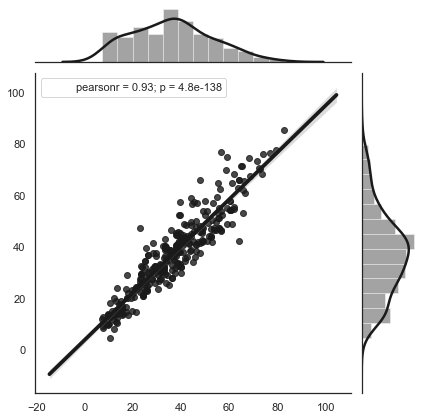

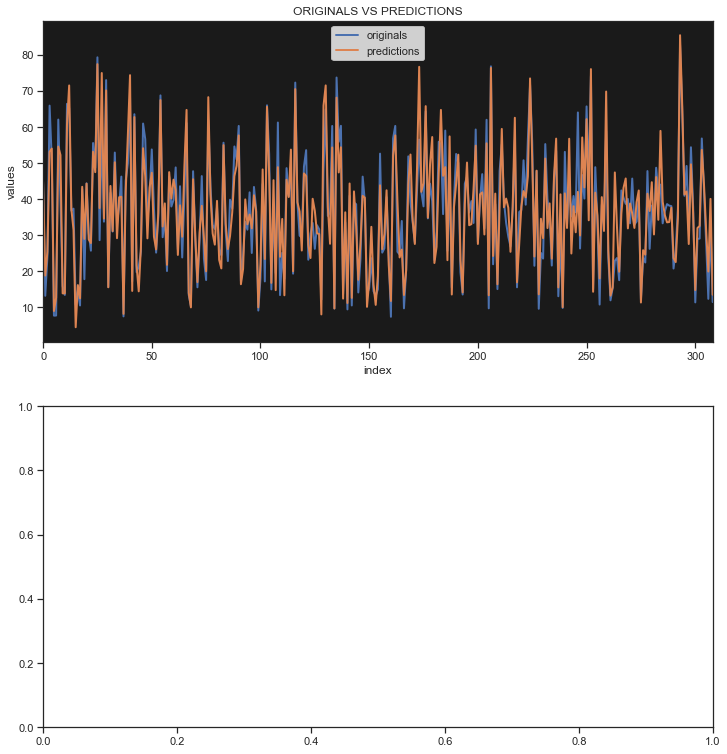

In [713]:
pipe_lr = Pipeline([('scl', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', Ridge(alpha=0.5))]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"polycoef", "Ridge - PowerTransformer - Polynomial - Original Data")

Pipeline(memory=None,
         steps=[('scl',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('rm',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.8634378256015625
MEAN ABSOLUTE ERROR : 4.507867055002709
***************************************************************************
TRAIN SCORE : 0.8808571631989004
TEST SCORE : 0.8711461255755328
PEARSONS COEFF for TEST : 0.9337603052854786 4.920

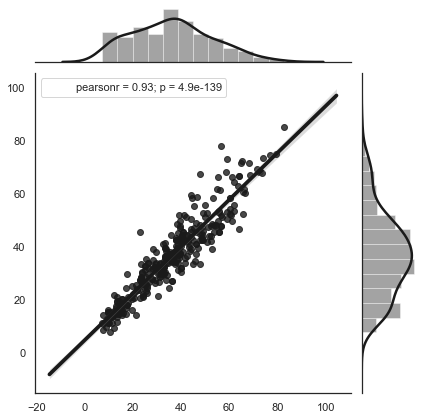

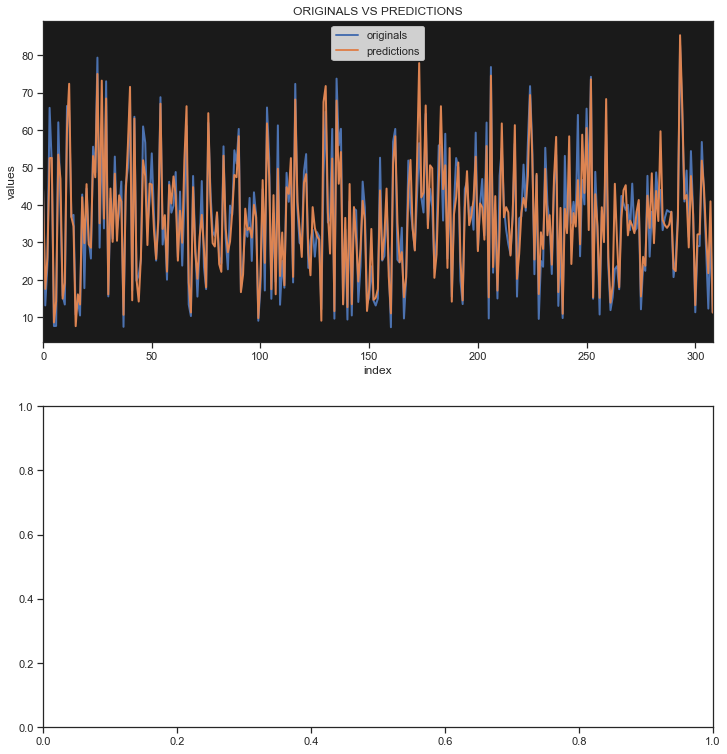

In [714]:
pipe_lr = Pipeline([('scl', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', Lasso(alpha=0.1))]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"polycoef", "Lasso - PowerTransformer - Polynomial - Original Data")

## Lasso seems to give similar performance as others ~93% with lesser number of polynomial features (34).

##### We do not see strong correlation between features hence not going for PCA.

### Trying Feature Engineering to see if we can uncover some relationship in underlying data and improve model performance.
#### On doing some research on concrete to understand the domain,  it appears that - Concrete is normally designed as the ratio of its various ingredients for various compressive strenghts. 
- For example, ratio of cement:fineagg:coarseagg is standardized for various strengths.
- Similarly, ratio of water:cement is also defined
- If other additives like flyash, slag, superplastic are included, they get added to cement for calculating the ratio.

#### Add columns for ratios and then do some EDA again.

In [715]:
# 1. Add ash, slag and superplastic to cement and then calculate ratio with fineagg(sand) and coarseagg
concrete['sum_cement'] = concrete['cement'] + concrete['ash'] + concrete['slag'] + concrete['superplastic']
concrete['solid_volume'] = concrete['sum_cement'] + concrete['fineagg'] + concrete['coarseagg']
con_r = pd.DataFrame()
con_r['cement_solid_ratio'] = concrete['sum_cement']/concrete['solid_volume']
con_r['fineagg_ratio'] = concrete['fineagg']/concrete['solid_volume']
con_r['coarseagg_ratio'] = concrete['coarseagg']/concrete['solid_volume']

# 2. Add ash, slag and superplastic to cement and then calculate ratio with water
concrete['cw_wt'] = concrete['sum_cement'] + concrete['water']
con_r['cement_cw_ratio'] = concrete['cement']/concrete['cw_wt']
con_r['water_cw_ratio'] = concrete['water']/concrete['cw_wt']

# 3. Add strength and age original columns
con_r['strength'] = concrete['strength']
con_r['age'] = concrete['age']


In [716]:
con_r.describe().transpose()

count       mean        std       min        25%  \
cement_solid_ratio  1030.0   0.191867   0.041861  0.092166   0.158415   
fineagg_ratio       1030.0   0.357894   0.035437  0.264666   0.338042   
coarseagg_ratio     1030.0   0.450239   0.034187  0.364628   0.428103   
cement_cw_ratio     1030.0   0.467107   0.141586  0.192982   0.359667   
water_cw_ratio      1030.0   0.311464   0.059256  0.182227   0.271833   
strength            1030.0  35.817961  16.705742  2.330000  23.710000   
age                 1030.0  45.662136  63.169912  1.000000   7.000000   

                          50%        75%         max  
cement_solid_ratio   0.184332   0.225787    0.297427  
fineagg_ratio        0.357527   0.384999    0.452196  
coarseagg_ratio      0.458294   0.472468    0.521435  
cement_cw_ratio      0.464166   0.592649    0.781437  
water_cw_ratio       0.318375   0.355010    0.473684  
strength            34.445000  46.135000   82.600000  
age                 28.000000  56.000000  365.000000

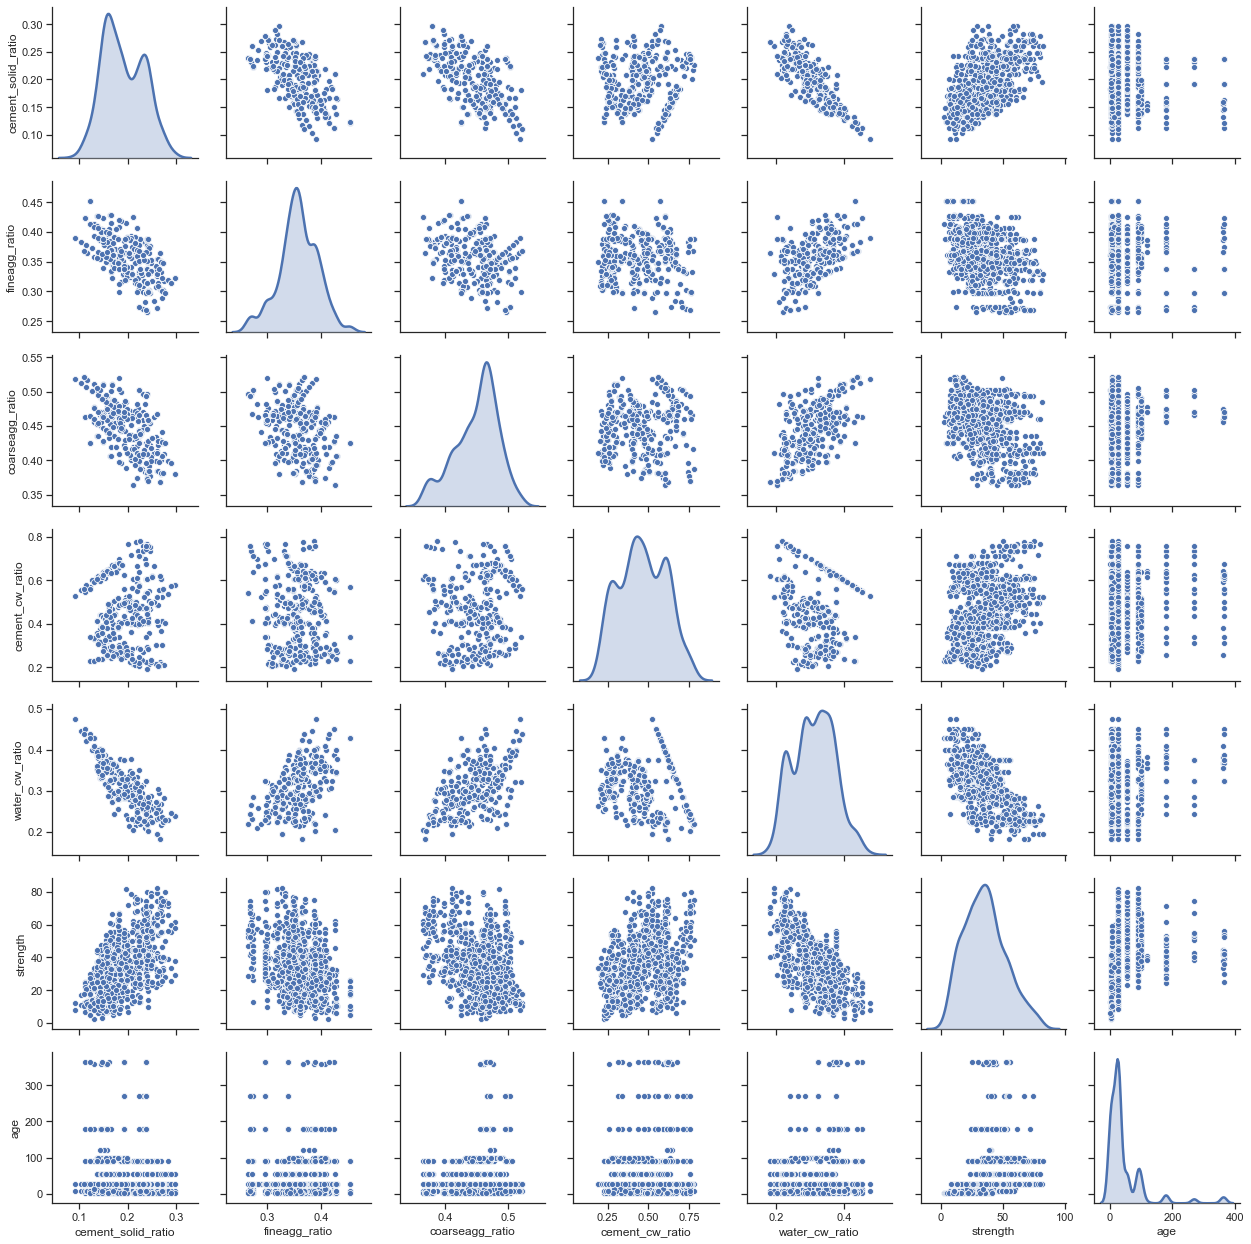

In [717]:
# Prepare a pair plot only for ratios
g = sns.pairplot(con_r, diag_kind='kde')



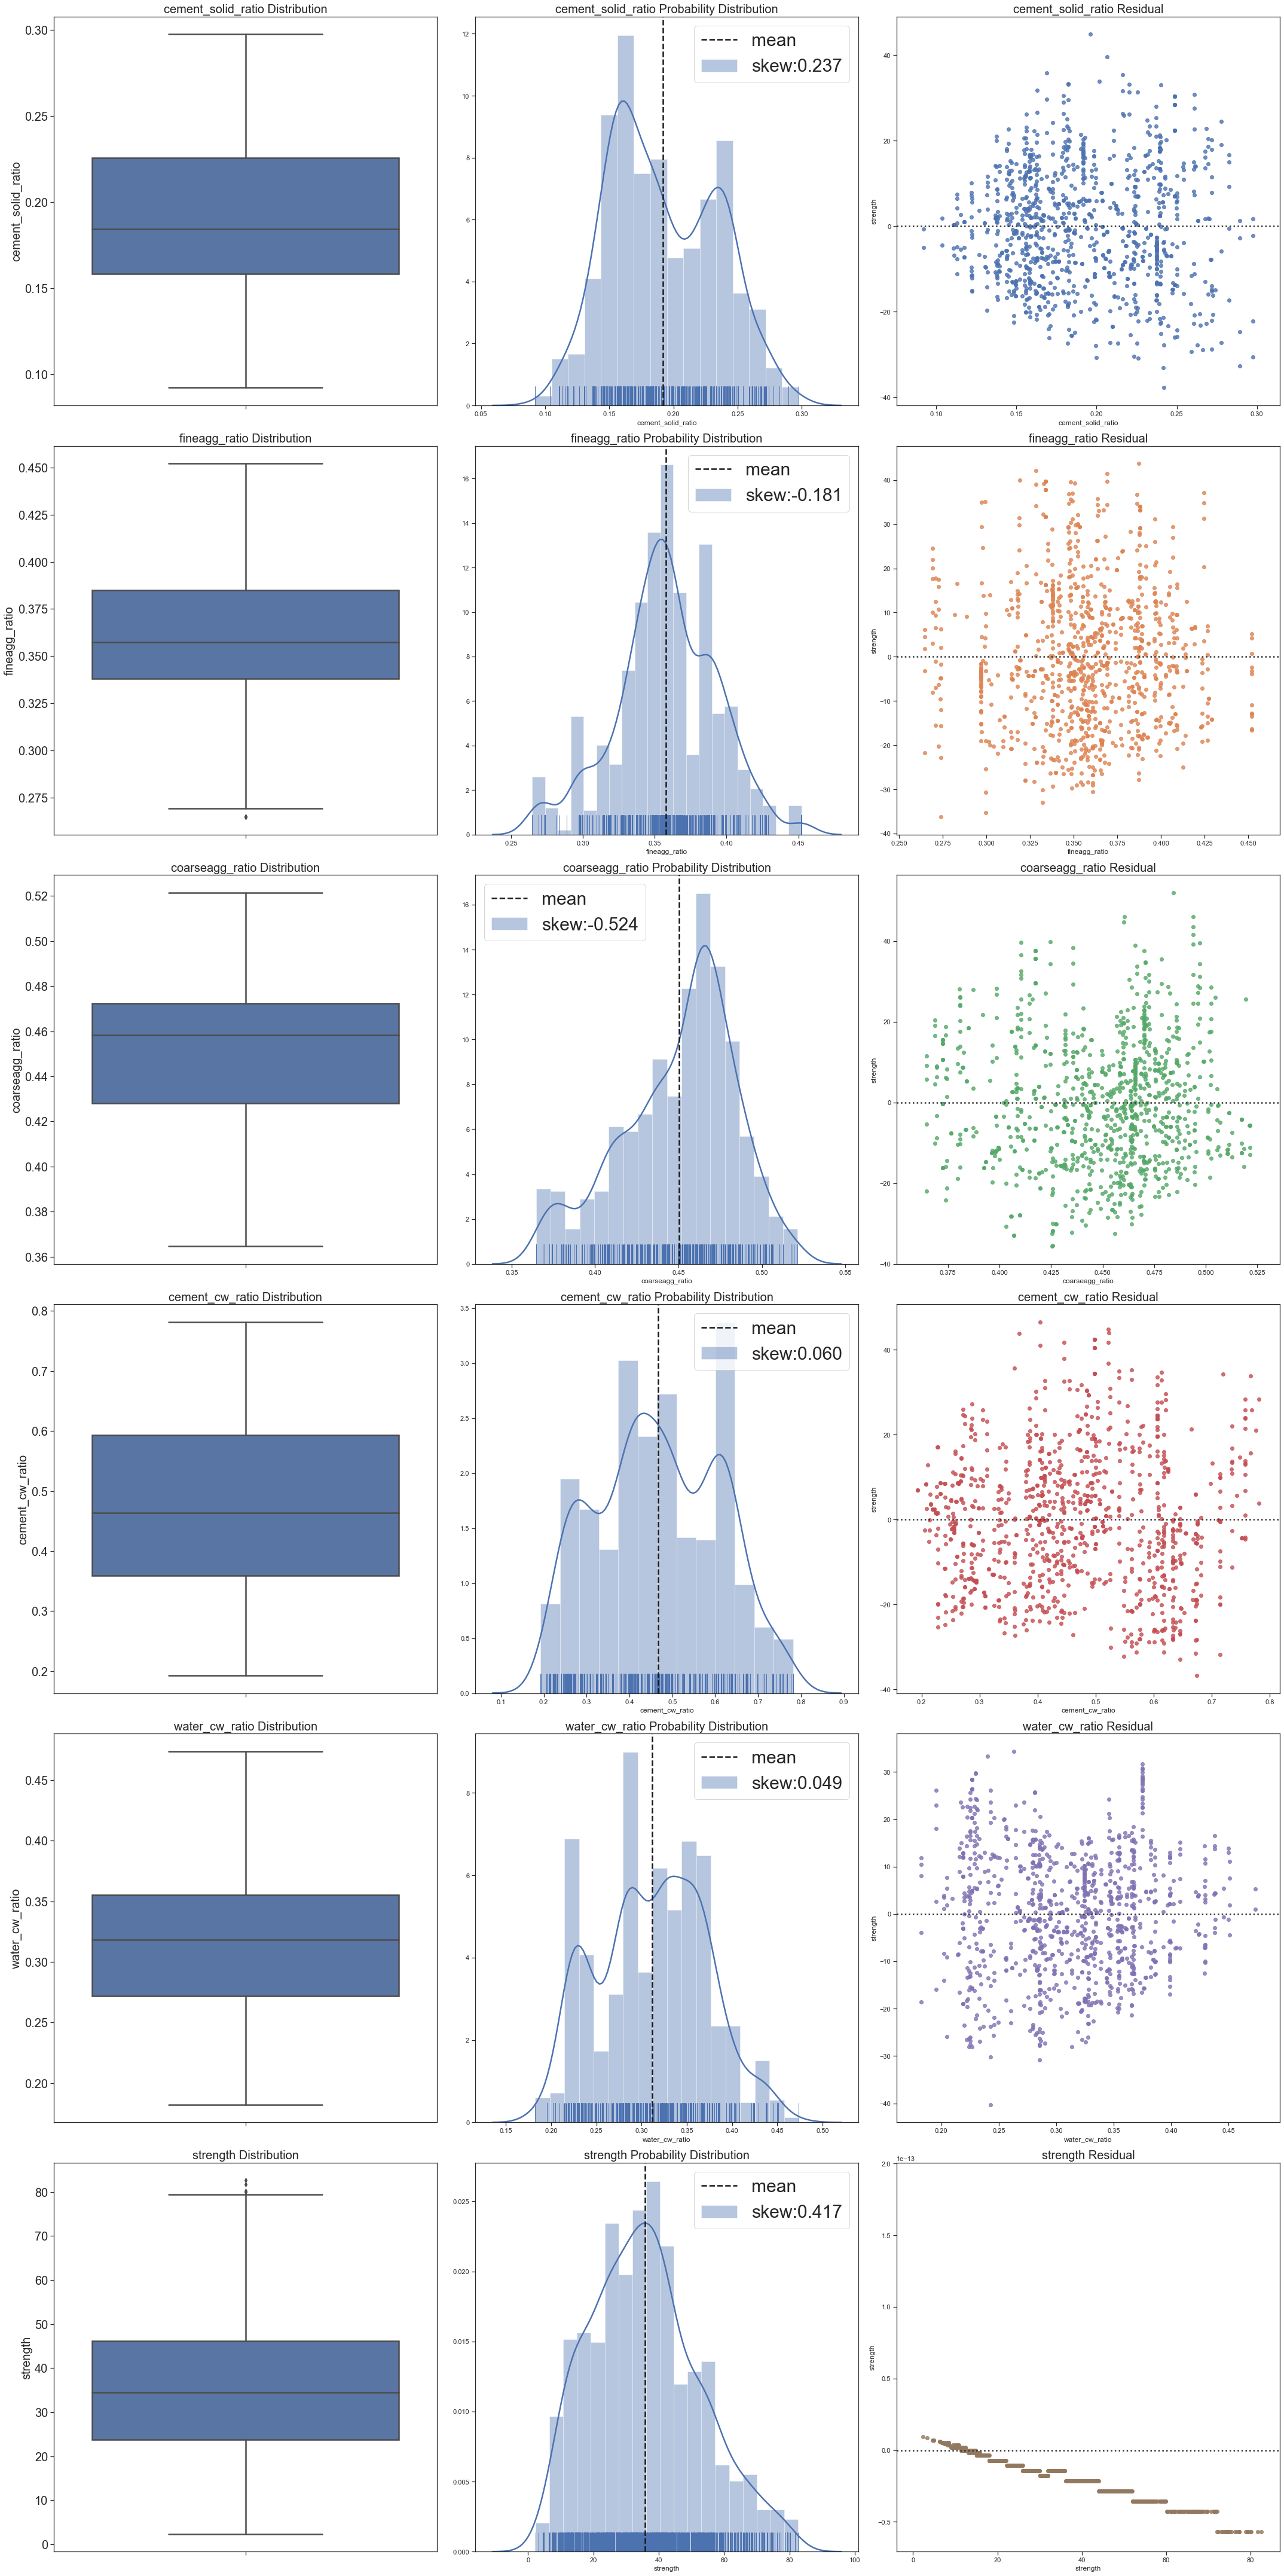

In [718]:
# Visualize individual variables
fig, ax_arr = plt.subplots(nrows = 6, ncols = 3, figsize = (30,60))
ind_vars = con_r.columns

plt_row=0
for col in ind_vars:
    if (col!='age'):
        sns.boxplot(y = con_r[col], data = con_r, orient = 'v', ax = ax_arr[plt_row, 0])
        ax_arr[plt_row,0].set_ylabel(col, fontsize=20)
        ax_arr[plt_row,0].set_title(col + ' Distribution', fontsize=20)
        ax_arr[plt_row,0].tick_params(labelsize=20)

        sns.distplot( con_r[col],  ax = ax_arr[plt_row,1], rug=True, label= 'skew:' + "{:.3f}".format(con_r[col].skew()))
        ax_arr[plt_row,1].axvline(con_r[col].mean(),linestyle="dashed",label="mean",color="k")
        ax_arr[plt_row,1].set_title(col + ' Probability Distribution', fontsize=20)
        ax_arr[plt_row,1].legend(loc="best",fontsize='30')
        
        sns.residplot(col, 'strength', data=con_r, ax= ax_arr[plt_row,2])
        ax_arr[plt_row,2].set_title(col + ' Residual', fontsize=20)

        plt_row+=1
            
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

##### Observation
1. Populations looks to have multiple Gaussians
2. Residual plots show hetroskesticity for most features. 

#### Exploring correlation between ingredients and with strength

Correlation with Target (Strength): 
 strength              1.000000
cement_solid_ratio    0.576162
age                   0.328873
cement_cw_ratio       0.292550
fineagg_ratio        -0.330307
coarseagg_ratio      -0.363099
water_cw_ratio       -0.631936
Name: strength, dtype: float64


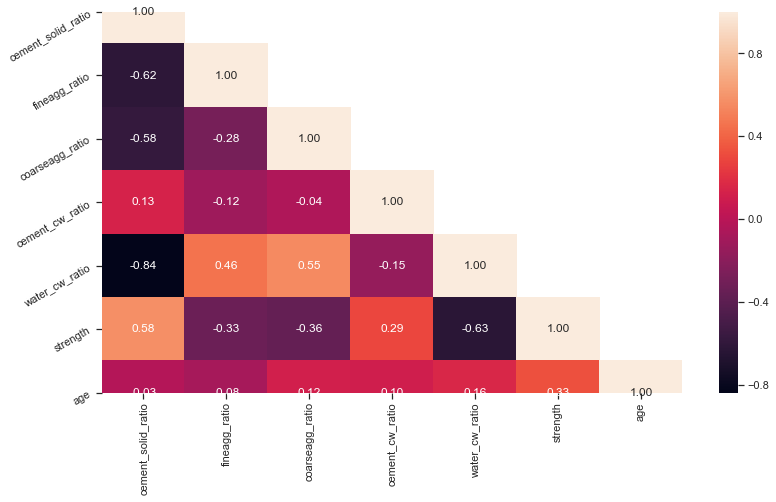

In [719]:
# Correlation with heat map
corr = con_r.corr()
print("Correlation with Target (Strength): \n", corr['strength'].sort_values(ascending=False))
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

##### Correlation of ingredient ratios -
- cement_solid_ratio has a high correlation with strength
- fineagg_ratio, coarseagg shows mild negative correlation
- water_cw_ratio shows high negative correlation with strength and very high negative correlation with cement_solid_ratio. This shows that less water is used when ration of cement is high in the mix of cement with aggregates.




### Model with Ratio data

In [720]:
# con_r['sum_cement'] = concrete['sum_cement'].values
# con_r['solid_volume'] = concrete['solid_volume'].values
# con_r['cw_wt'] = concrete['cw_wt'].values

X = con_r.drop(['strength'], axis=1)
Y = con_r[['strength']]
print(con_r.head())
# 30% of the data will be used for testing
test_size= 0.30
seed = 100

k_fold = KFold(n_splits=10, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

   cement_solid_ratio  fineagg_ratio  coarseagg_ratio  cement_cw_ratio  \
0            0.170380       0.360966         0.468654         0.253772   
1            0.155721       0.358132         0.486146         0.334787   
2            0.161896       0.396994         0.441110         0.464166   
3            0.191726       0.338042         0.470232         0.437500   
4            0.166061       0.333126         0.500813         0.286349   

   water_cw_ratio  strength  age  
0        0.365481     29.89   28  
1        0.313776     23.51   14  
2        0.347939     29.22   28  
3        0.375000     45.85   28  
4        0.357566     18.29   28  


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.118960145619322
MEAN ABSOLUTE ERROR : 8.205106355860407
***************************************************************************
TRAIN SCORE : 0.6065338981852249
TEST SCORE : 0.6162356717016992
PEARSONS COEFF for TEST : 0.7851842005865824 7.373714411146749e-66
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.66789136791854
cv-std  : 25.39947582709452
cv-max  : -81.86285254283352
cv-min  : -173.03952723785335


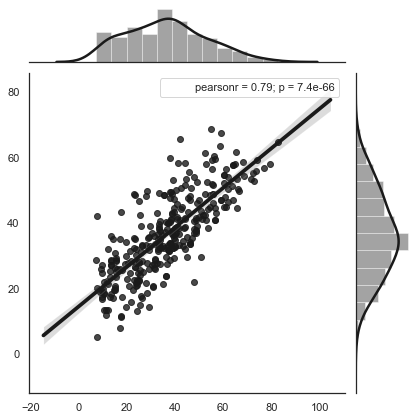

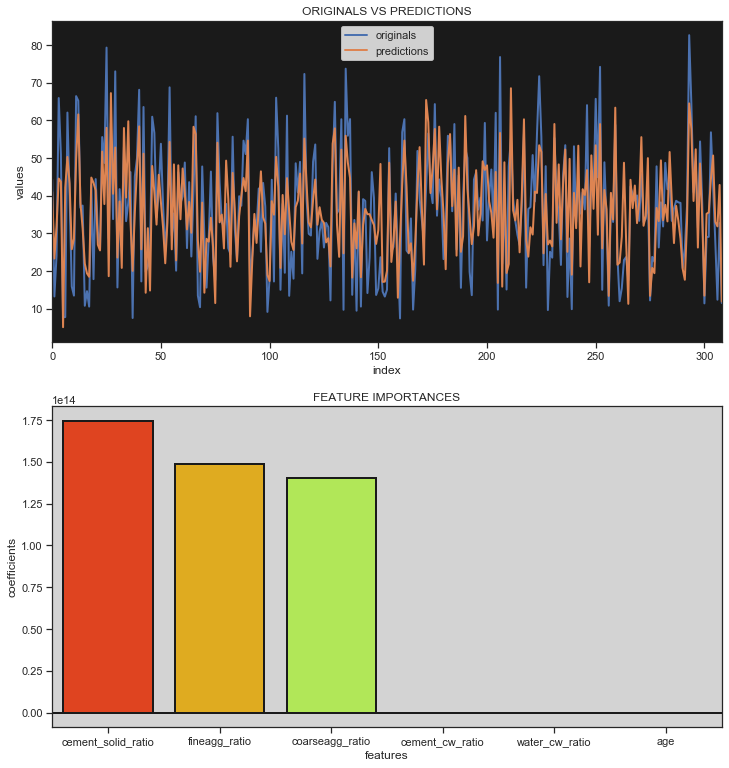

In [721]:

# lr = LinearRegression()
pipe_lr = Pipeline([('scl', StandardScaler()), ('rm', LinearRegression())]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"coef", "Linear Regression - Standard Scaler - Modified Data")

#### Even ratio with standard scalar gives the same result as original data. We'll have to find other ways to improve the model.
#### The above Pairplot shows multiple gaussians and the residual plot shows hetroskadasticity (variance varies with strength). - Try using box-cox to correct and normalize data.

Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='box-cox',
                                  standardize=True)),
                ('rm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.378810007349548
MEAN ABSOLUTE ERROR : 5.757909722469112
***************************************************************************
TRAIN SCORE : 0.8048574670761776
TEST SCORE : 0.7959364258191384
PEARSONS COEFF for TEST : 0.8929396742867727 1.9738646517995383e-108
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -56.70617969505006
cv-std  : 16.591343742718845
cv-max  : -32.58113041828889
cv-min  : -85.2121303638321


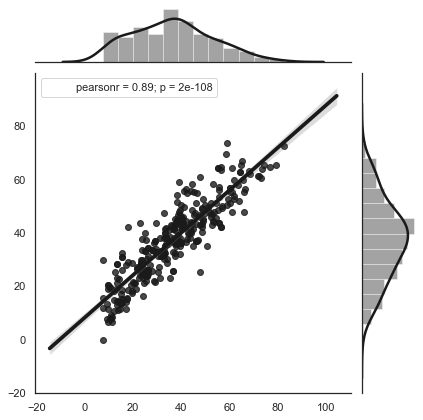

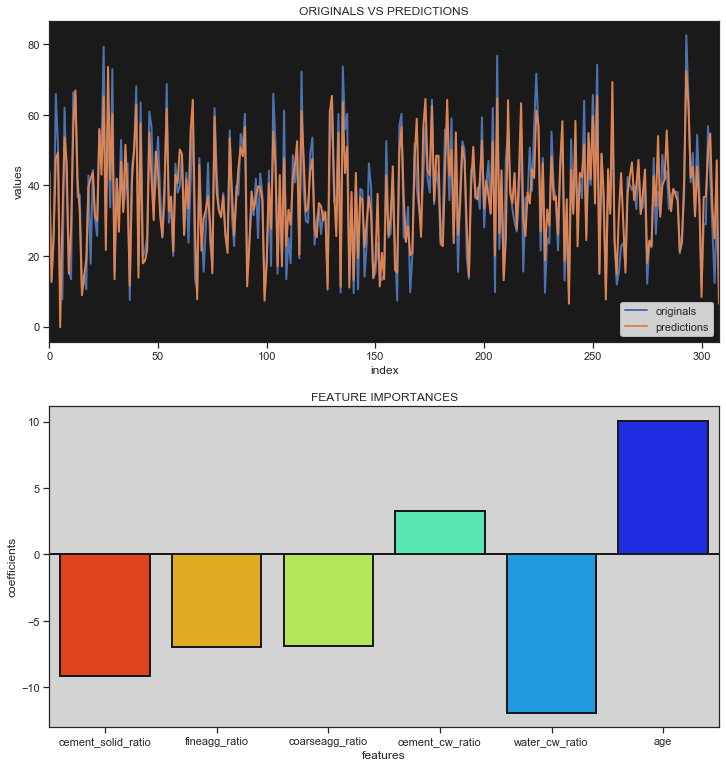

In [722]:
# Using Box-Cox Transform
pipe_lr = Pipeline([('pt', PowerTransformer(method='box-cox')),('rm', LinearRegression())]) 
model(pipe_lr,x_train,y_train,x_test,y_test,"coef", "Linear Regression - PowerTransformer - Modified Data")


##### Almost 90% now. 
#### Lets figure out clusters now. From the plot there seem to be 3 - 4 clusters.
#### Explore clusters

In [555]:
# The low score is due to the apparent mix of gaussians
# Let us explore the data for hidden clusters

cluster_range = range( 2, 10 )   # expect 3 to 4 clusters from the pair panel visual inspection hence restricting from 2 to 10
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(con_r)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]


# ridge = Ridge(alpha=.3)
# model(ridge,x_train,y_train,x_test,y_test,"coef")

num_clusters  cluster_errors
0             2    1.458983e+06
1             3    6.909592e+05
2             4    4.680420e+05
3             5    3.353232e+05
4             6    2.459806e+05
5             7    1.749915e+05
6             8    1.270162e+05
7             9    1.089944e+05

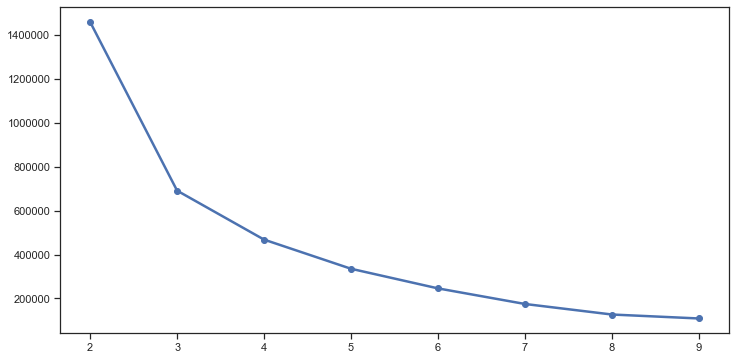

In [556]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [557]:
# Lets use 5 clusters

cc_df_attr = con_r.loc[:,:]
cc_df_attr_z = cc_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 5, random_state = 2354 )
cluster.fit(cc_df_attr_z)

prediction=cluster.predict(cc_df_attr_z)
cc_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

cc_df_attr_z_copy = cc_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

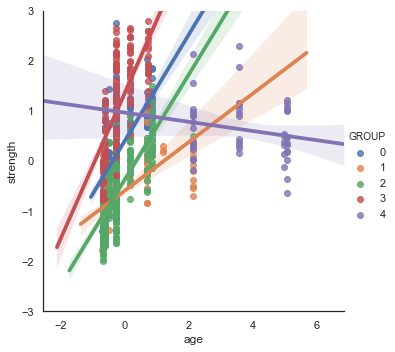

In [558]:
with sns.axes_style("white"):
    plot = sns.lmplot("age",'strength',data=cc_df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

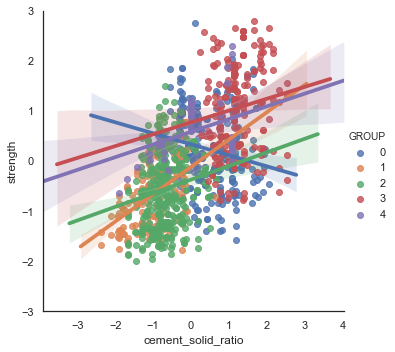

In [559]:
with sns.axes_style("white"):
    plot = sns.lmplot("cement_solid_ratio",'strength',data=cc_df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

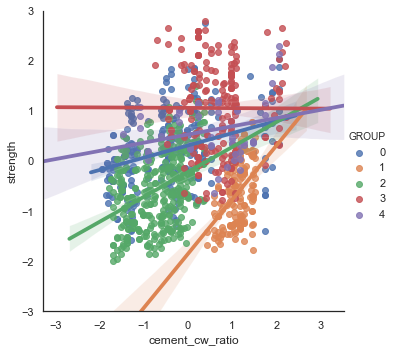

In [560]:
with sns.axes_style("white"):
    plot = sns.lmplot("cement_cw_ratio",'strength',data=cc_df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

##### No clear clusters emerge. Lets explore age further. From the pairplot it appears that max strength is lower for lowest and maximum ages. In the middle the strength has a greater value. Trying binning.

In [561]:
# get unique age values of each cluster
print(con_r['age'].value_counts(normalize=True).sort_index())

# Let's try see the % of data we'd have to work with for different cutoffs
cutoffs = [28, 150]
for cutoff in cutoffs:
    print('{0:.1f}% with age > {1}'.format(100.0 * con_r[ con_r.age > cutoff ].shape[0] / con_r.shape[0], cutoff))

1      0.001942
3      0.130097
7      0.122330
14     0.060194
28     0.412621
56     0.088350
90     0.052427
91     0.021359
100    0.050485
120    0.002913
180    0.025243
270    0.012621
360    0.005825
365    0.013592
Name: age, dtype: float64
27.3% with age > 28
5.7% with age > 150


Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='box-cox',
                                  standardize=True)),
                ('rm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.259046709744652
MEAN ABSOLUTE ERROR : 4.0185703634016825
***************************************************************************
TRAIN SCORE : 0.8070491785390471
TEST SCORE : 0.8331004773844728
PEARSONS COEFF for TEST : (0.9131153468245867, 3.476255107784457e-39)
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -30.543364687879034
cv-std  : 19.496024519783877
cv-max  : -4.94821369732317
cv-min  : -74.24357066748323
Pipeline(memory=None,
         steps=[('pt',


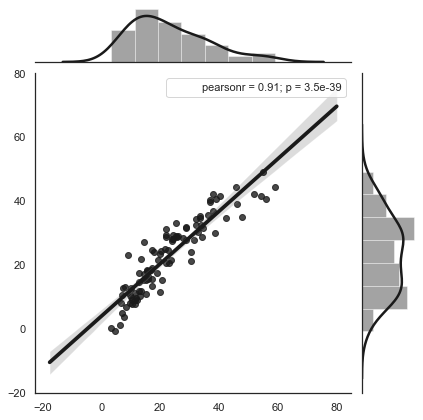

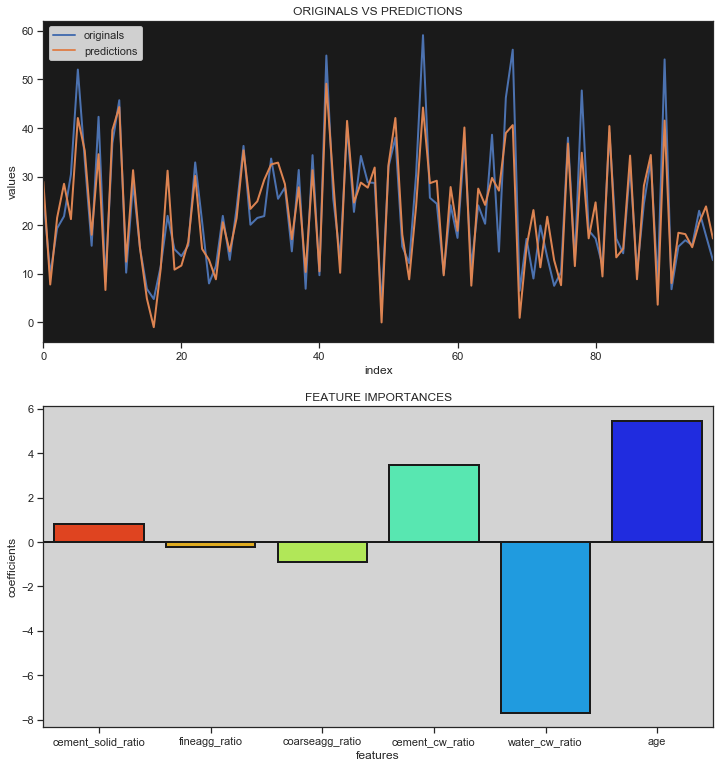

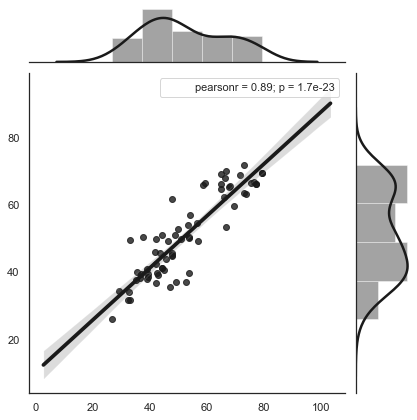

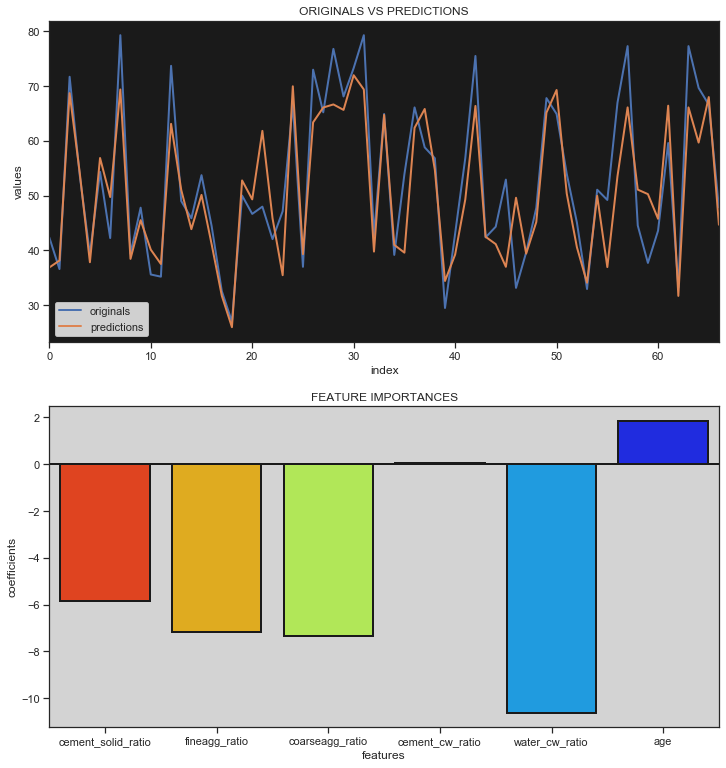

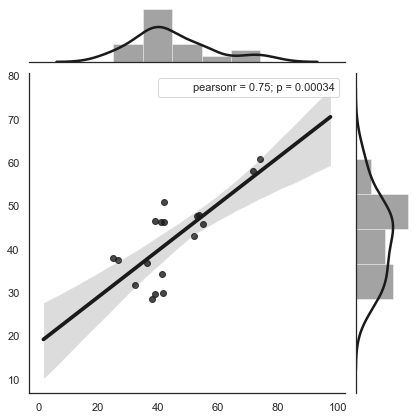

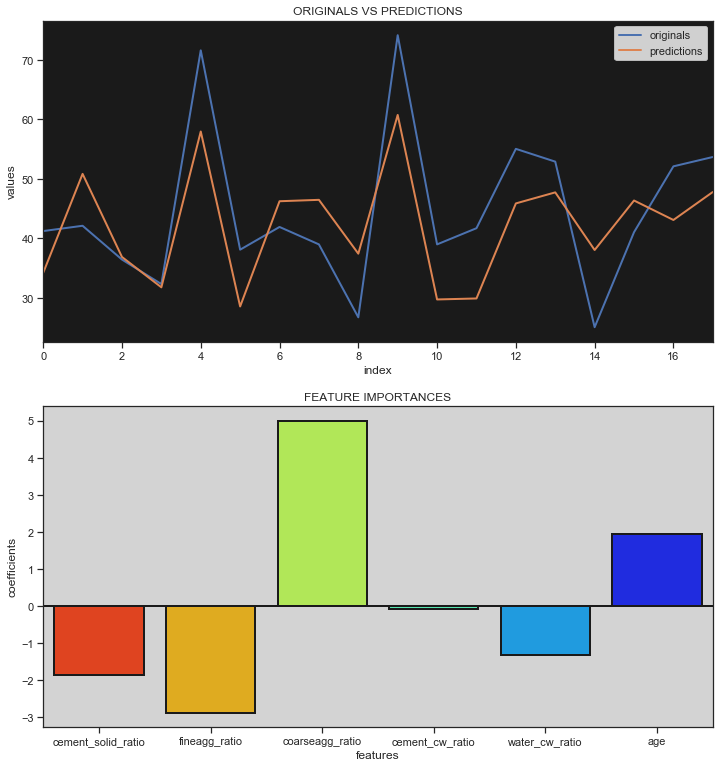

In [562]:
# Lets model with these three clusters
# 0-28
# 29-200
# >200

cond = [con_r['age']<28, (con_r['age']>28) & (con_r['age']<=150), con_r['age'] >150 ]

for c in cond:
    conr_temp = con_r[c]
    X = conr_temp.drop(['strength'], axis=1)
    Y = conr_temp[['strength']]
    # 30% of the data will be used for testing
    test_size= 0.30
    seed = 100
    k_fold = KFold(n_splits=10, shuffle=True)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    pipe_lr = Pipeline([('pt', PowerTransformer(method='box-cox')),('rm', LinearRegression())]) 
    model(pipe_lr,x_train,y_train,x_test,y_test,"coef")

#### At lower ages, seems like we get almost 91% accuracy, however at higher ages it decreases. Have tried it with various cutoffs but no efficient clusters found during various trials.

#### Lets try Polynomial Features with Lasso as that behaved best on original data.

In [723]:

X = con_r.drop(['strength'], axis=1)
Y = con_r[['strength']]

# 30% of the data will be used for testing
test_size= 0.30
seed = 100

k_fold = KFold(n_splits=10, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('rm',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.003988394222207
MEAN ABSOLUTE ERROR : 5.361604916647374
***************************************************************************
TRAIN SCORE : 0.8330685167116033
TEST SCORE : 0.8161415187115134
PEARSONS COEFF for TEST : 0.9045509326687179 1.10761

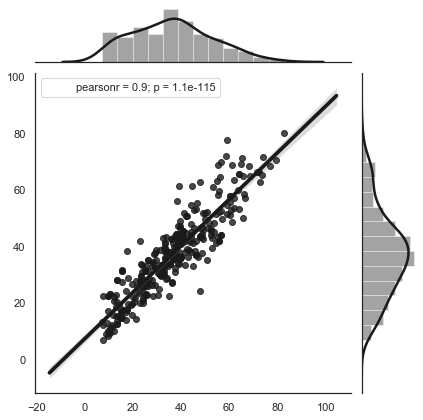

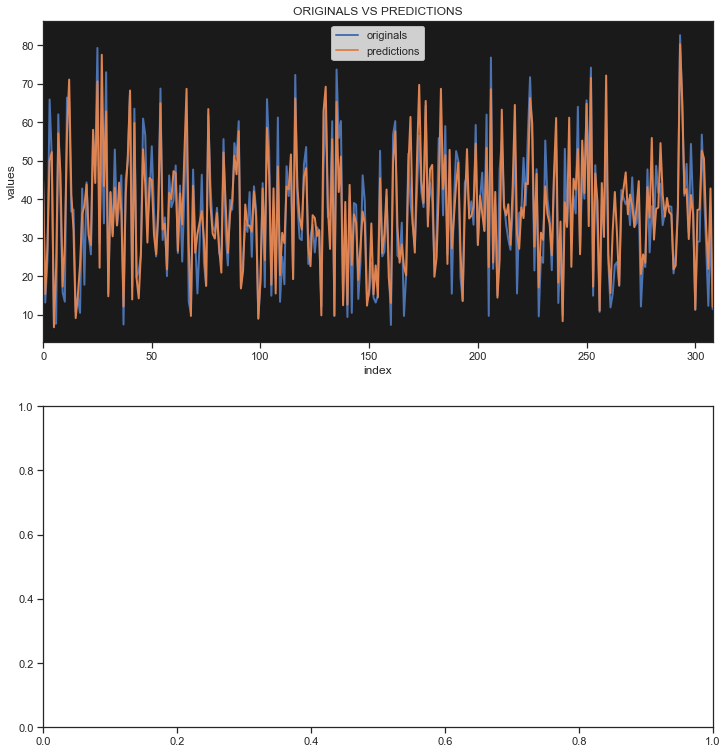

In [724]:
pipeline = Pipeline(steps=[('pt', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', Lasso(alpha=0.1))])
model(pipeline,x_train,y_train,x_test,y_test,"polycoef", "Lasso - PowerTransformer - Polynomial - Modified Data")

##### 90% is less than what we got for original data. Lets try scaling the target variable. 

In [769]:
X = con_r.drop(['strength'], axis=1)
Y = con_r[['strength']].apply(zscore)

# 30% of the data will be used for testing
test_size= 0.30
seed = 100

k_fold = KFold(n_splits=10, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('rm',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 0.47567478488411025
MEAN ABSOLUTE ERROR : 0.3695007233117026
***************************************************************************
TRAIN SCORE : 0.7721221850444004
TEST SCORE : 0.7635590030988826
PEARSONS COEFF for TEST : 0.8900104810790083 9.83

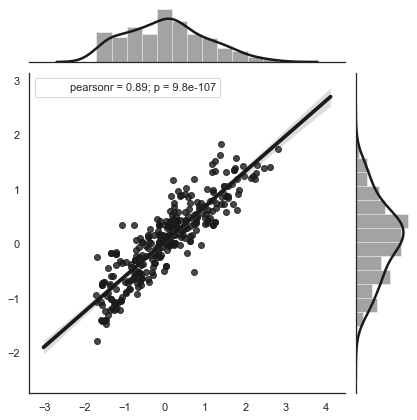

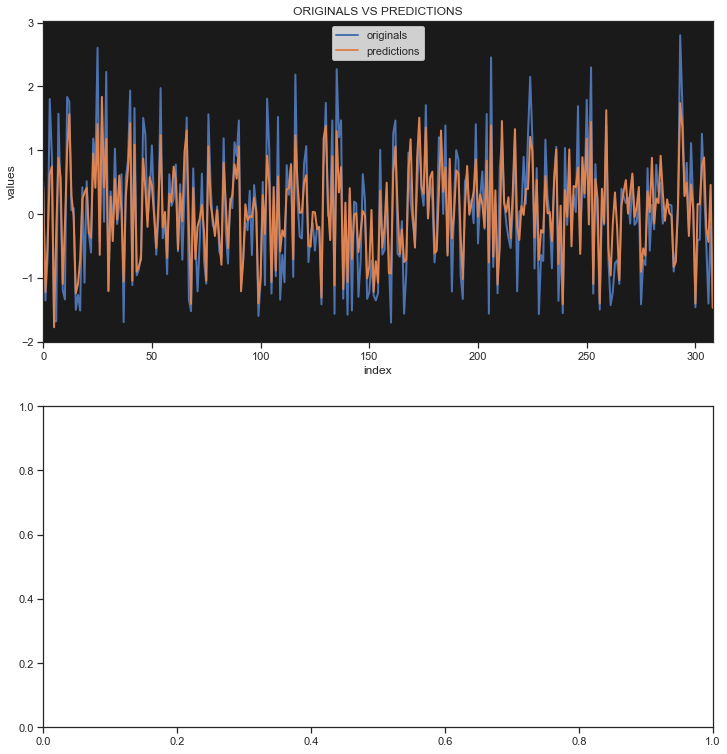

In [726]:
pipeline = Pipeline(steps=[('pt', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', Lasso(alpha=0.1))])
model(pipeline,x_train,y_train,x_test,y_test,"polycoef")

##### Try PCA on this ratio data since we see some correlation.

Explained Variance Ratio :/n [0.99999281 0.99999803 0.99999948 0.99999988 1.         1.        ]
Pipeline(memory=None,
         steps=[('rm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 0.8715496337804741
MEAN ABSOLUTE ERROR : 0.7221783289030257
***************************************************************************
TRAIN SCORE : 0.189534840596799
TEST SCORE : 0.20624445834779426
PEARSONS COEFF for TEST : 0.4670802843657412 3.775558953655998e-18
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -0.8337899662913444
cv-std  : 0.21719597499486049
cv-max  : -0.4922995672488222
cv-min  : -1.3187217945668115


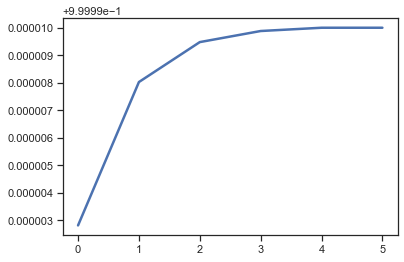

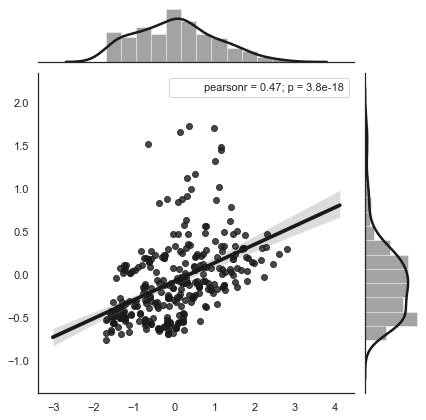

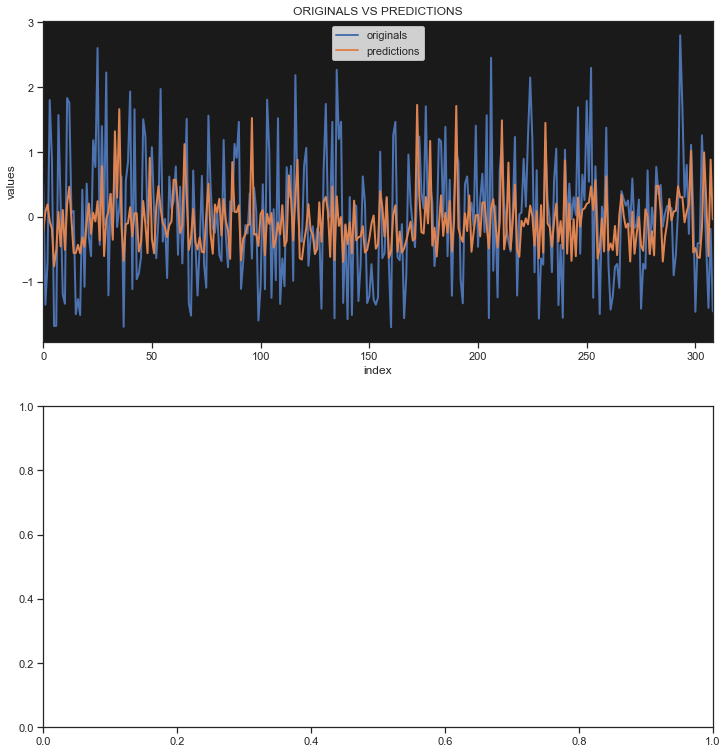

In [771]:
## There are several variables that are highly correlated with each other
#Run PCA and plot to visualise the ideal number of components
#print(x_train)
# transform just the age factor to zscore
sc_x_train = x_train.loc[:,'cement_solid_ratio':'water_cw_ratio']
sc_x_train["sc_age"] = x_train[["age"]].apply(zscore)

#sc_x_train.drop("age")
#print(sc_x_train)
pca = PCA().fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

print("Explained Variance Ratio :/n", np.cumsum(pca.explained_variance_ratio_))
# Looks like just one component captures most of the details - Interesting. Lets take it for a spin.
# Based on the plot, we will select 2 components that explain more than 99% of the variance
# Something doesnt feel right
# @Moderator: Sir, Please could you help me understand this.

pca = PCA(n_components=2)
pca.fit(sc_x_train)

#Assign the components to the X variable
sc_x_test = x_test.loc[:,'cement_solid_ratio':'water_cw_ratio']
sc_x_test["sc_age"] = x_test[["age"]].apply(zscore)

pca_x_train = pca.transform(sc_x_train)
pca_x_test = pca.transform(sc_x_test)

# Lets send this data to the linear pipeline since the data is already scaled.
# lr = LinearRegression()
pipe_lr = Pipeline([('rm', LinearRegression())]) 
model(pipe_lr,pca_x_train,y_train,pca_x_test,y_test,"")



#### Clearly I could not make PCA work.

#### Moderator: Please help me understand where I went wrong.

### Moving back to original data with Lasso and Hypertune.

In [727]:
 # First with Original Age
#X = concrete.drop(['strength', 'Log_age', 'sum_cement', 'solid_volume', 'cw_wt'], axis=1)
X = concrete.drop(['strength', 'Log_age'], axis=1)

Y = concrete[['strength']]

print(X.head())
# 30% of the data will be used for testing
test_size= 0.30
seed = 100

k_fold = KFold(n_splits=10, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   sum_cement  solid_volume  cw_wt  
0       353.3        2073.6  556.8  
1       346.2        2223.2  504.5  
2       351.2        2169.3  538.6  
3       380.0        1982.0  608.0  
4       347.3        2091.4  540.6  


Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('rm',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.8634378256015625
MEAN ABSOLUTE ERROR : 4.507867055002709
***************************************************************************
TRAIN SCORE : 0.8808571631989004
TEST SCORE : 0.8711461255755328
PEARSONS COEFF for TEST : (0.9337603052854786, 4.92

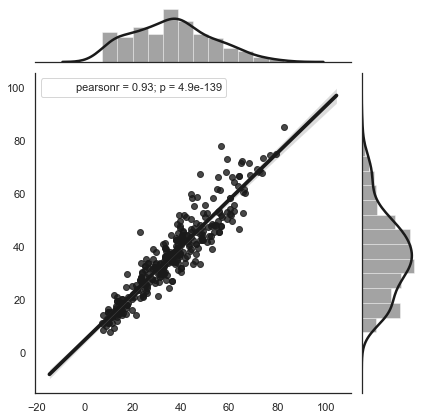

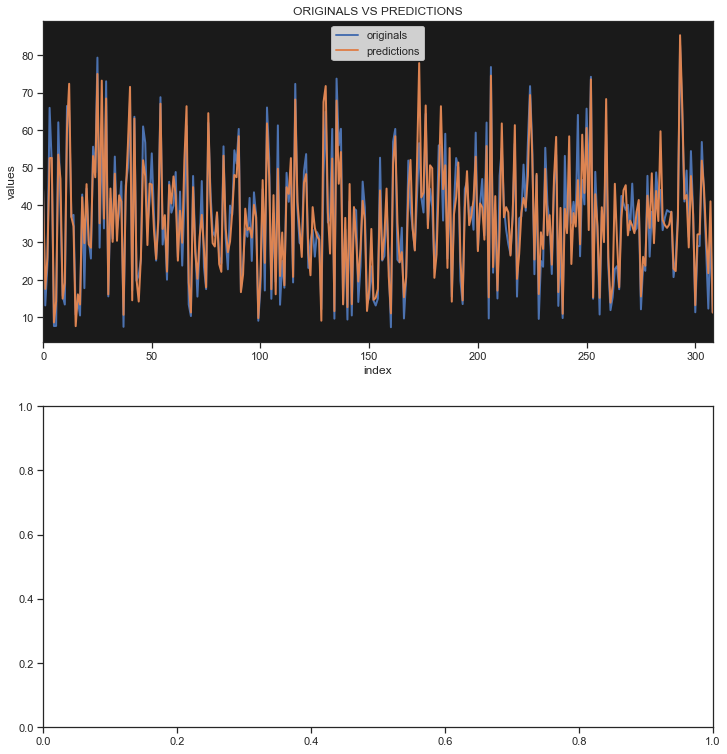

In [678]:
pipeline = Pipeline(steps=[('pt', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', Lasso(alpha=0.1))])
model(pipeline,x_train,y_train,x_test,y_test,"polycoef")

#### Orginal Score about 93% (93.37%) with Lasso using 34 attributes.

## Hypertune Parameters for Lasso to see if we can make it better.

In [679]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'rm__alpha': [0.0001,0.001,0.005, 0.002,0.01,0.05,0.09,0.1,0.5,0.9,1.0,1.5,2, 2,5.5, 10, 100, 200]}
# create and fit a ridge regression model, testing random alpha values

pipe_lr = Pipeline([('scl', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', Lasso(alpha=0.1))]) 

rsearch = GridSearchCV(pipe_lr, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=4)
rsearch.fit(x_train,y_train)
print(rsearch)
print(rsearch.best_score_)
print(rsearch.best_estimator_["rm"].alpha)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        PowerTransformer(copy=True,
                                                         method='yeo-johnson',
                                                         standardize=True)),
                                       ('pf',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=True,
                                                           order='C')),
                                       ('rm',
                                        Lasso(alpha=0.1, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                        

##### Got an alpha of 0.05 after GridSearchCV.
##### Fit on the alpha

Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('rm',
                 Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.860006233522248
MEAN ABSOLUTE ERROR : 4.482330825685331
***************************************************************************
TRAIN SCORE : 0.8845735372865166
TEST SCORE : 0.8712969055637565
PEARSONS COEFF for TEST : 0.9341234258049063 2.1774

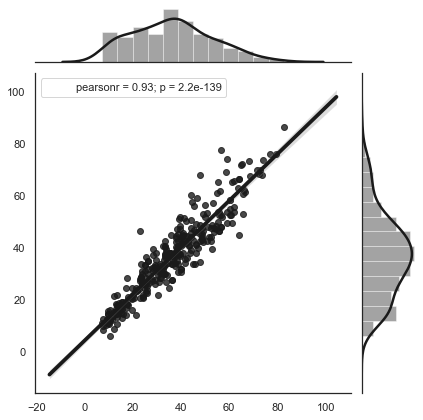

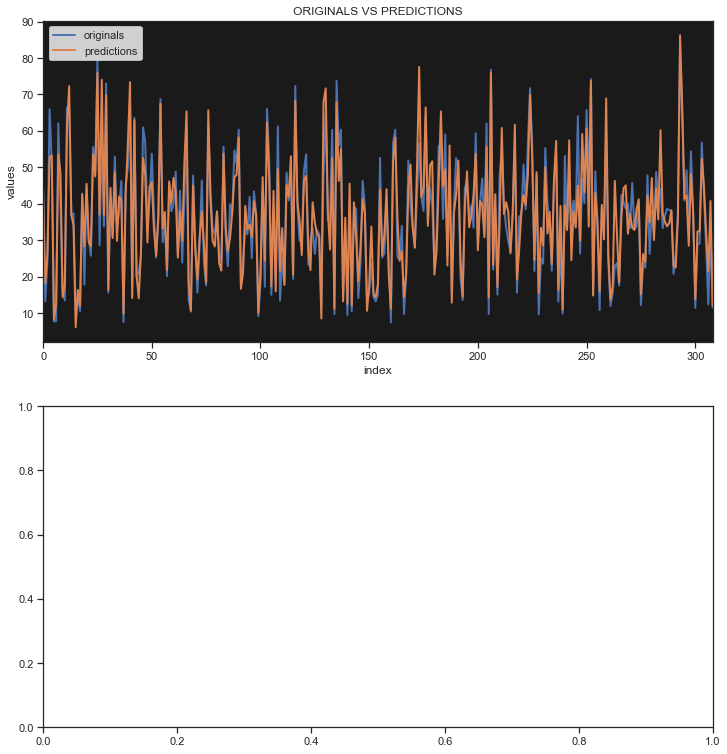

In [728]:
pipeline = Pipeline(steps=[('pt', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', Lasso(alpha=0.05))])
model(pipeline,x_train,y_train,x_test,y_test,"polycoef", "Lasso - PowerTransformer - Polynomial - TUNED - Original Data")



### Ok.. So we are able to squeeze just 0.04% more. We have reached 93.4% by hypertuning keeping a moderate Test and Training score. However, number of parameters have increased from 34 to 37. I dont think it makes sense to gain a fraction of percentage point at the expense of model complexity.

#### Try other Non-linear Regressors

Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('rm',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.45725889821997
MEAN ABSOLUTE ERROR : 4.68784789644013
******

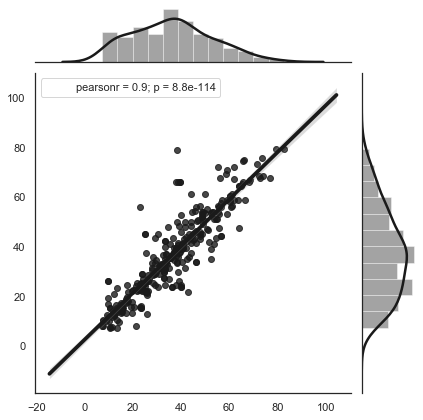

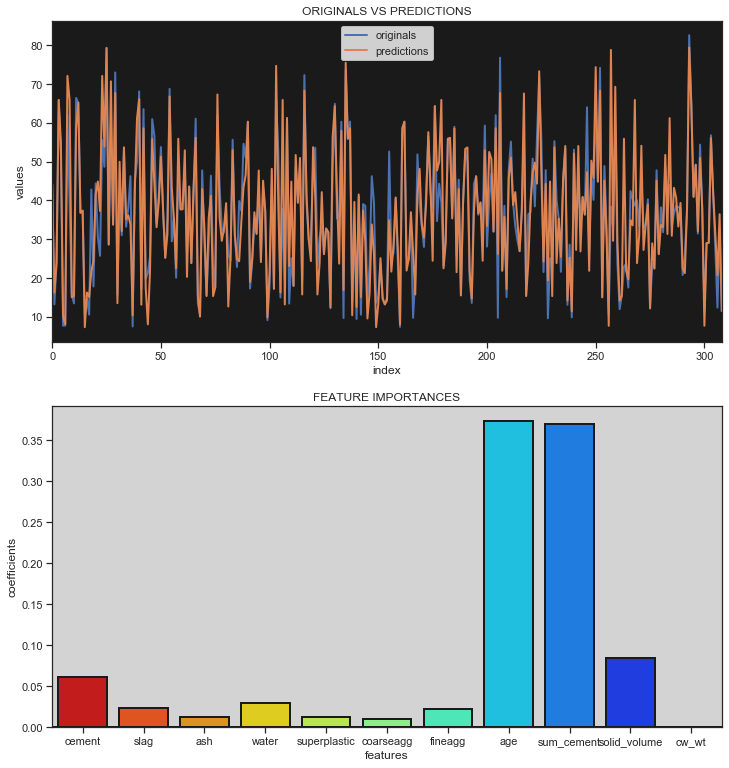

In [729]:
from sklearn.tree import DecisionTreeRegressor

#pipeline = Pipeline(steps=[('pt', PowerTransformer()),('pf',PolynomialFeatures(degree = 2, interaction_only=True)), ('rm', DecisionTreeRegressor())])
pipeline = Pipeline(steps=[('pt', PowerTransformer()), ('rm', DecisionTreeRegressor())])
model(pipeline,x_train,y_train,x_test,y_test,"feat", "DecisionTree - PowerTransformer - Original Data")


Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('rm',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)
************

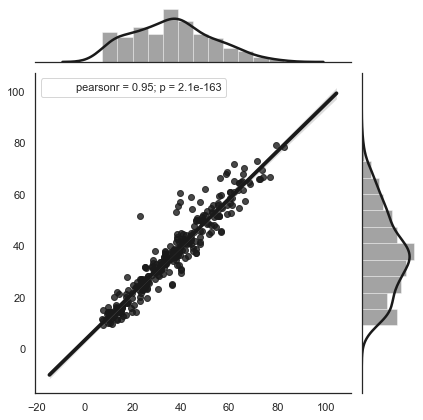

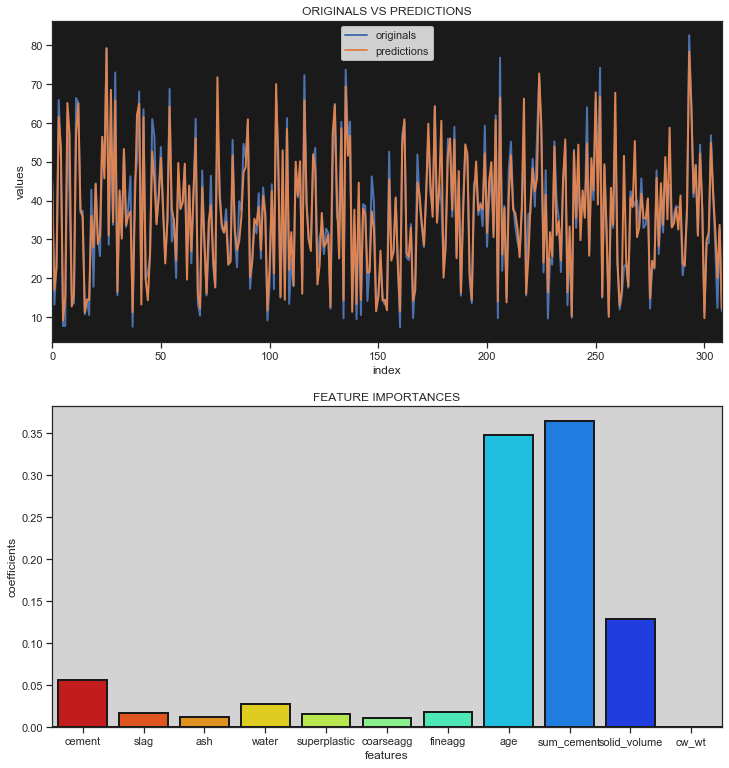

In [731]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[('pt', PowerTransformer()), ('rm', RandomForestRegressor())])
model(pipeline,x_train,y_train,x_test,y_test,"feat", "RandomForest - PowerTransformer - Original Data")

Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('rm',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_n

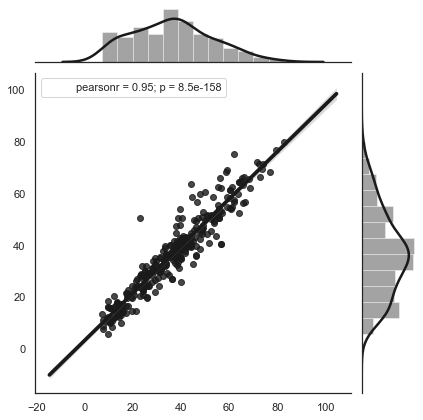

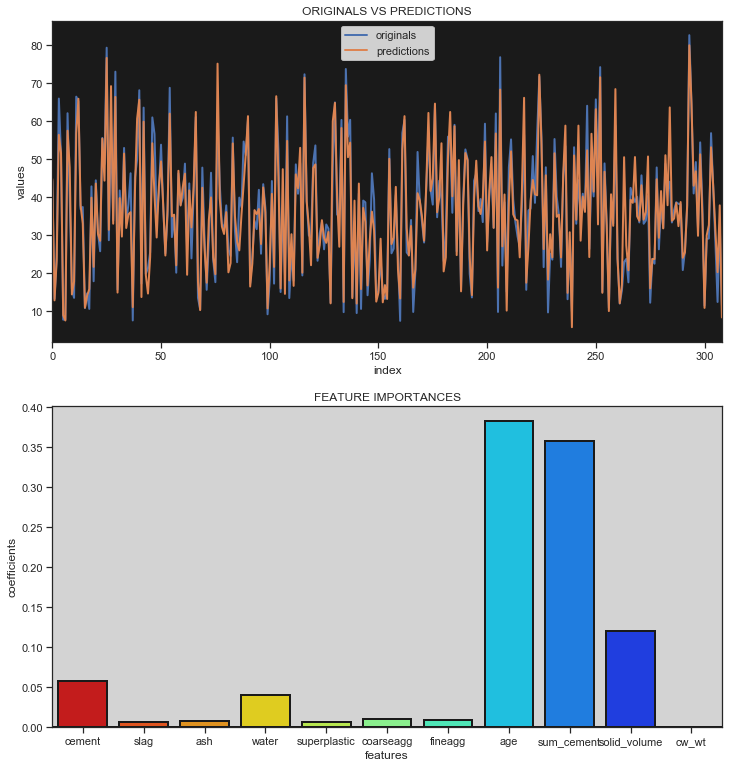

In [732]:
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline(steps=[('pt', PowerTransformer()), ('rm', GradientBoostingRegressor())])
model(pipeline,x_train,y_train,x_test,y_test,"feat", "GradientBoosting - PowerTransformer - Original Data")

Pipeline(memory=None,
         steps=[('rm',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)
***************************************************************************
[17:49:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ROOT MEAN SQUARED ERROR : 5.000995119563638
M

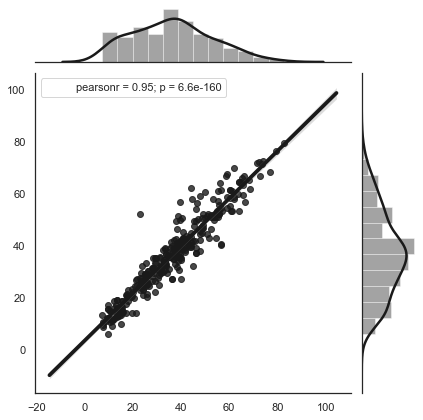

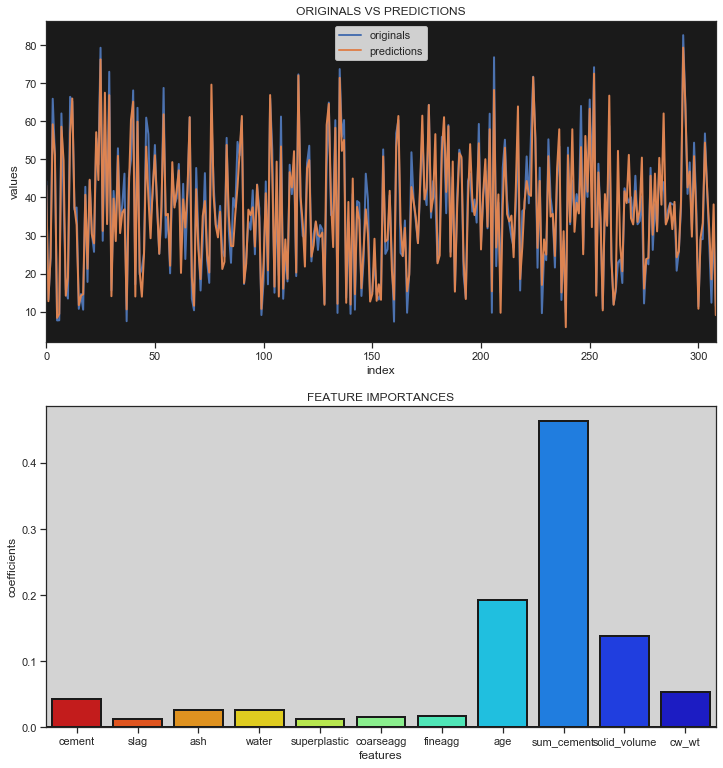

In [733]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
pipeline = Pipeline(steps=[ ('rm', XGBRegressor())])
model(pipeline,x_train,y_train,x_test,y_test,"feat", "XGBRegressor - Original Data")

In [749]:
dfObj = pd.DataFrame(modelResult).transpose()
df_u = dfObj.drop(["Model"],axis=1)
df_u.sort_values(by=['Pearsonsr', 'RMSE'], ascending=False)


RMSE Train Score  \
RandomForest - StandardScaler - Original Data       4.84128    0.986654   
RandomForest - PowerTransformer - Original Data     4.87763    0.986603   
XGBRegressor - Original Data                          5.001    0.952504   
GradientBoosting - PowerTransformer - Original ...  5.08171    0.956592   
Lasso - PowerTransformer - Polynomial - TUNED -...  5.86001    0.884574   
Lasso - PowerTransformer - Polynomial - Origina...  5.86344    0.880857   
Ridge - PowerTransformer - Polynomial - Origina...  5.95122    0.891679   
Linear Regression - PowerTransformer - Polynomi...  5.96548     0.89278   
Lasso - PowerTransformer - Original Data            6.81951    0.824248   
Ridge - PowerTransformer - Original Data            6.84223    0.825328   
Linear Regression - PowerTransformer - Original...  6.84749     0.82535   
Lasso - PowerTransformer - Polynomial - Modifie...  7.00399    0.833069   
DecisionTree - PowerTransformer - Original Data     7.45726    0.998884   
Linear Regression - PowerTransformer - Modified...  7.37881    0.804857   
LR - Standard Scaler - Original Data                10.0389    0.611418   
Lasso - StandardScaler - Original Data              10.2573    0.595871   
Linear Regression - Standard Scaler - Modified ...   10.119    0.606534   

                                                   Test Score Pearsonsr  \
RandomForest - StandardScaler - Original Data        0.912156  0.955202   
RandomForest - PowerTransformer - Original Data      0.910832  0.954518   
XGBRegressor - Original Data                         0.906264  0.952015   
GradientBoosting - PowerTransformer - Original ...   0.903214   0.95043   
Lasso - PowerTransformer - Polynomial - TUNED -...   0.871297  0.934123   
Lasso - PowerTransformer - Polynomial - Origina...   0.871146   0.93376   
Ridge - PowerTransformer - Polynomial - Origina...   0.867259  0.932733   
Linear Regression - PowerTransformer - Polynomi...   0.866622  0.932444   
Lasso - PowerTransformer - Original Data               0.8257  0.909305   
Ridge - PowerTransformer - Original Data             0.824536  0.908608   
Linear Regression - PowerTransformer - Original...   0.824266  0.908459   
Lasso - PowerTransformer - Polynomial - Modifie...   0.816142  0.904551   
DecisionTree - PowerTransformer - Original Data      0.791574  0.901645   
Linear Regression - PowerTransformer - Modified...   0.795936   0.89294   
LR - Standard Scaler - Original Data                 0.622283  0.788961   
Lasso - StandardScaler - Original Data               0.605672   0.78716   
Linear Regression - Standard Scaler - Modified ...   0.616236  0.785184   

                                                    CV Mean  
RandomForest - StandardScaler - Original Data      -25.4717  
RandomForest - PowerTransformer - Original Data     -25.565  
XGBRegressor - Original Data                       -27.0455  
GradientBoosting - PowerTransformer - Original ... -27.2938  
Lasso - PowerTransformer - Polynomial - TUNED -... -37.4464  
Lasso - PowerTransformer - Polynomial - Origina... -37.8341  
Ridge - PowerTransformer - Polynomial - Origina... -36.5524  
Linear Regression - PowerTransformer - Polynomi... -36.4327  
Lasso - PowerTransformer - Original Data            -51.263  
Ridge - PowerTransformer - Original Data            -51.176  
Linear Regression - PowerTransformer - Original... -51.3938  
Lasso - PowerTransformer - Polynomial - Modifie... -49.6182  
DecisionTree - PowerTransformer - Original Data    -51.0772  
Linear Regression - PowerTransformer - Modified... -56.7062  
LR - Standard Scaler - Original Data               -113.533  
Lasso - StandardScaler - Original Data             -117.213  
Linear Regression - Standard Scaler - Modified ... -114.668

In [753]:
## RandomForest is overfitting. Lets try to prune and hypertune it.
pipeline = Pipeline(steps=[('pt', StandardScaler()), ('rm', RandomForestRegressor())])

param_grid = {'rm__max_depth': np.arange(3, 8),
             'rm__criterion' : ['mse','mae'],
             'rm__max_leaf_nodes': [100,105, 90,95],
             'rm__min_samples_split': [6,7,8,9,10],
             'rm__max_features':['auto','sqrt','log2']}

grid_tree = GridSearchCV(pipeline, param_grid, cv = 5, scoring= 'r2', verbose=5, n_jobs=4)
grid_tree.fit(x_train, y_train)
# print(grid_tree.best_estimator_["rm"])
print("Best Params: \n",grid_tree.best_params_)
print("Best Score: \n",np.abs(grid_tree.best_score_))

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   19.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   31.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   48.6s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 2170 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 10.3min
[Parallel(n_jobs=4)]: Done 3000 out of 3000 | elapsed: 13.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pt',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rm',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                            

In [754]:
grid_tree.best_params_

{'rm__criterion': 'mse',
 'rm__max_depth': 7,
 'rm__max_features': 'auto',
 'rm__max_leaf_nodes': 90,
 'rm__min_samples_split': 6}

Pipeline(memory=None,
         steps=[('pt',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rm',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=7,
                                       max_features='auto', max_leaf_nodes=90,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=6,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)
**************************************************************

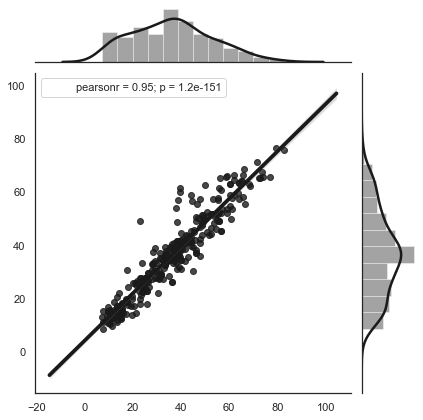

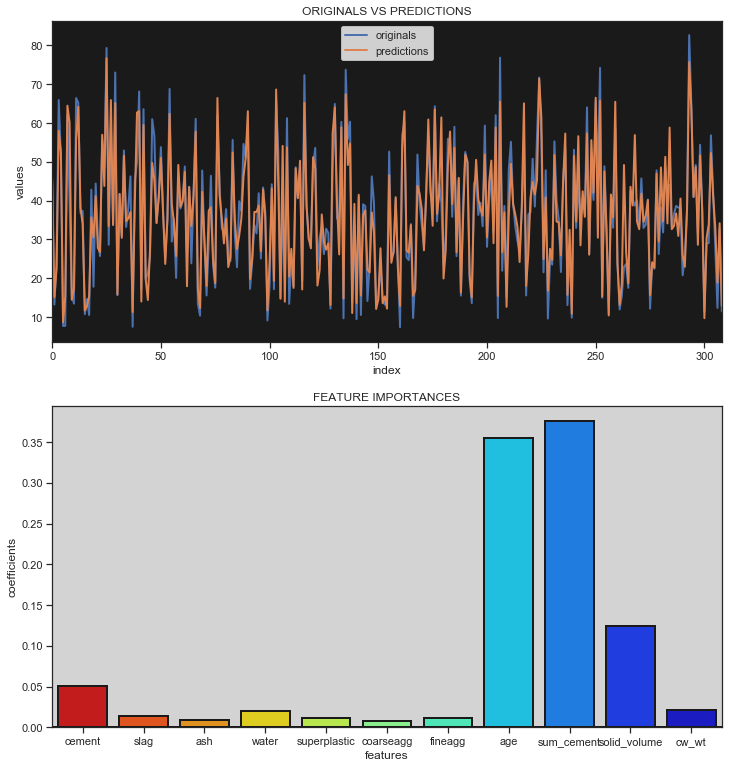

In [755]:
pipeline = Pipeline(steps=[('pt', StandardScaler()), ('rm', RandomForestRegressor(criterion='mse', max_depth=7, max_features='auto', max_leaf_nodes=90, min_samples_split=6))])
model(pipeline,x_train,y_train,x_test,y_test,"feat", "")

##### RandomForest with standard scalar hypertune doesnt improve performance.

In [756]:
pipeline = Pipeline(steps=[('pt', PowerTransformer()), ('rm', RandomForestRegressor())])

param_grid = {'rm__max_depth': np.arange(3, 8),
             'rm__criterion' : ['mse','mae'],
             'rm__max_leaf_nodes': [100,105, 90,95],
             'rm__min_samples_split': [6,7,8,9,10],
             'rm__max_features':['auto','sqrt','log2']}

grid_tree = GridSearchCV(pipeline, param_grid, cv = 5, scoring= 'r2', verbose=5, n_jobs=4)
grid_tree.fit(x_train, y_train)
print("Best Params: \n",grid_tree.best_params_)
print("Best Score: \n",np.abs(grid_tree.best_score_))

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   36.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   57.4s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 2170 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 3000 out of 3000 | elapsed: 13.9min finished


Best Params: 
 {'rm__criterion': 'mse', 'rm__max_depth': 7, 'rm__max_features': 'auto', 'rm__max_leaf_nodes': 100, 'rm__min_samples_split': 6}
Best Score: 
 0.8861297093546888


Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('rm',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=7,
                                       max_features='auto', max_leaf_nodes=10,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=6,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)
*****************

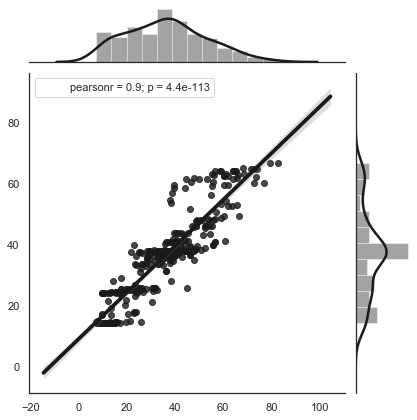

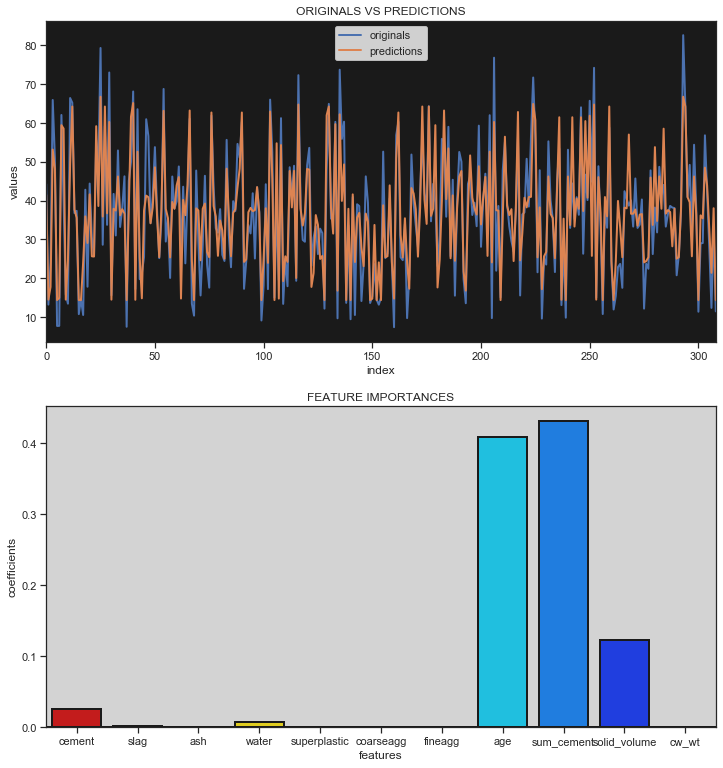

In [757]:
pipeline = Pipeline(steps=[('pt', PowerTransformer()), ('rm', RandomForestRegressor(criterion='mse', max_depth=7, max_features='auto', max_leaf_nodes=10, min_samples_split=6))])
model(pipeline,x_train,y_train,x_test,y_test,"feat", "")

#### Hypertune XGBRegressor

In [763]:
param_grid = {'n_estimators':range(0,500,50),
              'max_depth':range(5,16,2), #range(5,16,2), 
              'min_samples_split':range(0,1001,200), #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = RandomizedSearchCV(XGBRegressor(random_state=1), 
                   param_distributions = param_grid, scoring='r2', 
                   cv=10,n_jobs=-1, n_iter=1000, verbose=4).fit(x_train, y_train)
print(clf.best_estimator_) 
print(clf.best_params_)
print("R Squared:",clf.best_score_)

#pipeline = Pipeline(steps=[ ('rm', XGBRegressor())])
#model(pipeline,x_train,y_train,x_test,y_test,"feat", "XGBRegressor - Original Data")

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2957 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 11.7min finished


[17:39:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_samples_split=0, missing=None,
             n_estimators=400, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
{'n_estimators': 400, 'min_samples_split': 0, 'max_depth': 5, 'learning_rate': 0.2}
R Squared: 0.9212010450521857


In [766]:
%%time
param_grid = {'n_estimators':range(380,421,10),
              'max_depth':range(3,7,1),
              'min_samples_split':range(0,100,30), #range(200,1001,200), 
              'learning_rate':[0.1, 0.2, 0.3],
             'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}
clf = RandomizedSearchCV(XGBRegressor(random_state=1), 
                   param_distributions = param_grid, scoring='r2', 
                   cv=10,n_jobs=-1, n_iter=1000, verbose=4).fit(x_train, y_train)
print(clf.best_estimator_) 
print(clf.best_params_)
print("R Squared:",clf.best_score_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 2957 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 4133 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 4794 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 5505 tasks      | el

[18:26:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_split=30,
             missing=None, n_estimators=420, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=1, reg_alpha=0.001,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)
{'reg_alpha': 0.001, 'n_estimators': 420, 'min_samples_split': 30, 'max_depth': 4, 'learning_rate': 0.2}
R Squared: 0.9262414423868183
CPU times: user 1min 8s, sys: 3.15 s, total: 1min 11s
Wall time: 40min 44s


Pipeline(memory=None,
         steps=[('rm',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.2,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              min_samples_split=30, missing=None,
                              n_estimators=420, n_jobs=1, nthread=None,
                              objective='reg:linear', random_state=1,
                              reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1,
                              seed=None, silent=None, subsample=1,
                              verbosity=1))],
         verbose=False)
***************************************************************************
[18:31:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squ

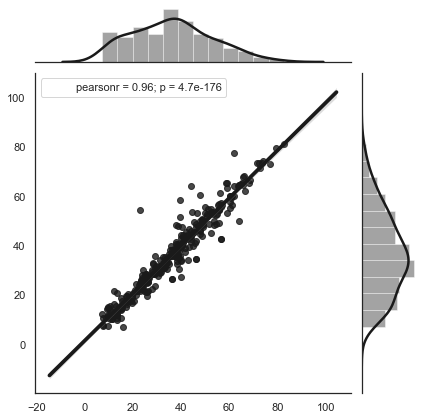

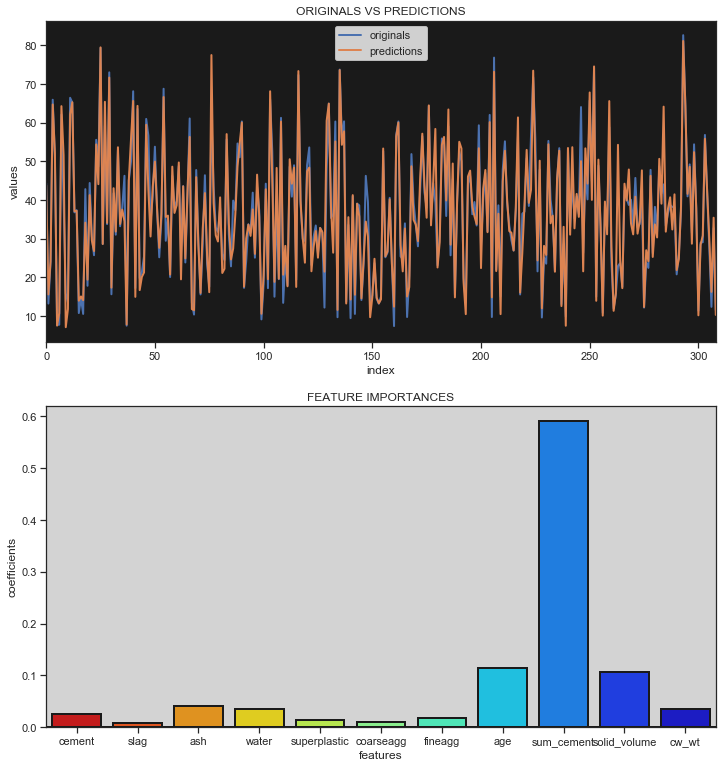

In [767]:
pipeline = Pipeline(steps=[ ('rm', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_split=30,
             missing=None, n_estimators=420, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=1, reg_alpha=0.001,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1))])
model(pipeline,x_train,y_train,x_test,y_test,"feat", "")

#### Hypertuning gets us to 96.25% but the model is overfit with an almost perfect train score and test score of 92%. 

#### Moderator: Sir, Please help me with some techniques to reduce/remove overfitting in this scenario.

In [768]:
# binomial confidence Level
from math import sqrt
test_size=len(y_test)
accuracy=0.9625
interval = 1.96 * sqrt( (accuracy * (1 - accuracy)) / test_size)*100

print('%.3f' % interval, '%')

2.118 %


##### At 95% confidence we can say that the model predicts 96.25 +/- 2.1%

### Conclusion

- Lasso with Powertransformer and PolynomialFeatures gets us to 93.4% with a decent Train/Test Score.
- Accuracy for Hypertuned XGBRegressor is more than 96% but at the expense of overfitting.
- Similarly, RandomForest and DecisionTree gets us to 95% but with overfitting.
- Feature Engineering with Ratio Data gets us to a max of 91% accuracy.
